In [27]:


# Paths to your CSVs
ok_path = r"F:\polito\term4\sdp project\Sensor_STWIN\Sensor_STWIN\vel-fissa\OK\PMI_250rpm\IIS3DWB_ACC.csv"
ko_path = r"F:\polito\term4\sdp project\Sensor_STWIN\Sensor_STWIN\vel-fissa\KO_LOW_2mm\PMI_400rpm\IIS3DWB_ACC.csv"

import pandas as pd
import matplotlib.pyplot as plt

def plot_sensor_csv(file_path, label):
    df = pd.read_csv(file_path)

    # Identify time column (any column that includes "time", case-insensitive)
    time_cols = [col for col in df.columns if 'time' in col.lower()]
    if time_cols:
        time_col = time_cols[0]
    else:
        time_col = None  # No time column found

    # Identify data columns (exclude time columns)
    data_cols = [col for col in df.columns if col != time_col]

    # Plot
    plt.figure(figsize=(10, 4))
    for col in data_cols:
        if time_col:
            plt.plot(df[time_col], df[col], label=col)
        else:
            plt.plot(df[col], label=col)

    plt.title(f"{label} - {file_path.split('/')[-1]}")
    plt.xlabel(time_col if time_col else "Sample Index")
    plt.ylabel("Sensor Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_sensor_csv(ok_path, "OK")
plot_sensor_csv(ko_path, "KO")

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\polito\\term4\\sdp project\\Sensor_STWIN\\Sensor_STWIN\\vel-fissa\\OK\\PMI_250rpm\\IIS3DWB_ACC.csv'

In [ ]:
import pandas as pd
import numpy as np

# Load sensor data
# ok_path = "processed_data/OK/STWIN_00022/IIS3DWB_ACC.csv"
# ko_path = "processed_data/KO_LOW_2mm/STWIN_00006/IIS3DWB_ACC.csv"

df_ok = pd.read_csv(ok_path)
df_ko = pd.read_csv(ko_path)

# Drop time column to focus on X, Y, Z values
ok_data = df_ok.drop(columns=['Time'])
ko_data = df_ko.drop(columns=['Time'])

# Manual statistics calculation
def manual_stats(df):
    stats = {}
    for axis in df.columns:
        values = df[axis].values
        stats[axis] = {
            'mean': np.mean(values),
            'std': np.std(values),
            'min': np.min(values),
            'max': np.max(values),
            'median': np.median(values),
            'variance': np.var(values),
        }
    return stats

ok_stats = manual_stats(ok_data)
ko_stats = manual_stats(ko_data)

# Display
def print_stats(label, stats_dict):
    print(f"📊 {label} Sample Statistics:")
    for axis, stats in stats_dict.items():
        print(f"  ▸ {axis}")
        for k, v in stats.items():
            print(f"     {k:<8}: {v:.4f}")
    print("\n")

print_stats("OK", ok_stats)
print_stats("KO", ko_stats)


📊 OK Sample Statistics:
  ▸ A_x [g]
     mean    : 0.0218
     std     : 0.0297
     min     : -0.1288
     max     : 0.2538
     median  : 0.0215
     variance: 0.0009
  ▸ A_y [g]
     mean    : -0.0971
     std     : 0.0191
     min     : -0.2279
     max     : 0.0693
     median  : -0.0971
     variance: 0.0004
  ▸ A_z [g]
     mean    : 1.0822
     std     : 0.0294
     min     : 0.8862
     max     : 1.3030
     median  : 1.0834
     variance: 0.0009


📊 KO Sample Statistics:
  ▸ A_x [g]
     mean    : 0.0211
     std     : 0.0422
     min     : -0.2484
     max     : 0.3543
     median  : 0.0210
     variance: 0.0018
  ▸ A_y [g]
     mean    : -0.0922
     std     : 0.0324
     min     : -0.2669
     max     : 0.1493
     median  : -0.0917
     variance: 0.0010
  ▸ A_z [g]
     mean    : 1.0738
     std     : 0.0392
     min     : 0.7139
     max     : 1.4318
     median  : 1.0741
     variance: 0.0015




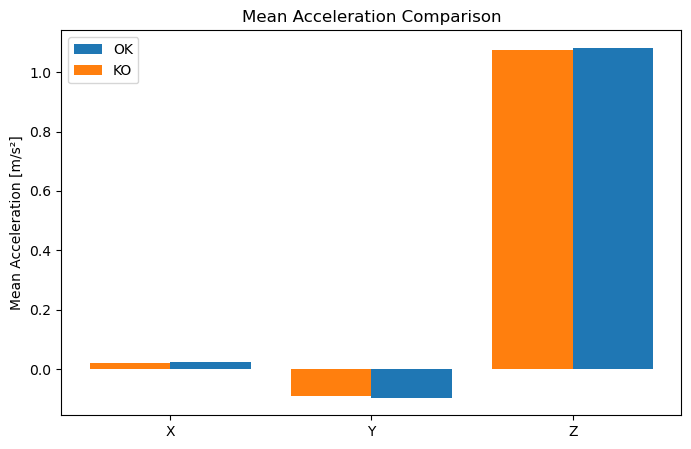

In [ ]:
import numpy as np

# Drop the Time column
df_ok_vals = df_ok.drop(columns=['Time'])
df_ko_vals = df_ko.drop(columns=['Time'])

# Mean comparison
ok_mean = df_ok_vals.mean()
ko_mean = df_ko_vals.mean()

plt.figure(figsize=(8, 5))
plt.bar(['X', 'Y', 'Z'], ok_mean, width=0.4, label='OK', align='edge')
plt.bar(['X', 'Y', 'Z'], ko_mean, width=-0.4, label='KO', align='edge')
plt.title("Mean Acceleration Comparison")
plt.ylabel("Mean Acceleration [m/s²]")
plt.legend()
plt.show()


compute stat and save on one big csv file

In [1]:
import os
import pandas as pd
import numpy as np

# Root of processed data
processed_root = r"F:\polito\term4\sdp project\Sensor_STWIN\processed data\no-load-cycles"

# Output list of all stats
all_stats = []

# Loop through label folders
for label in os.listdir(processed_root):
    label_path = os.path.join(processed_root, label)
    if not os.path.isdir(label_path):
        continue

    # Loop through each sample
    for sample in os.listdir(label_path):
        sample_path = os.path.join(label_path, sample)
        if not os.path.isdir(sample_path):
            continue

        # Loop through each sensor CSV
        for csv_file in os.listdir(sample_path):
            if not csv_file.endswith(".csv"):
                continue

            file_path = os.path.join(sample_path, csv_file)
            sensor = csv_file.replace(".csv", "")

            try:
                df = pd.read_csv(file_path)
                if 'Time[s]' in df.columns:
                    df = df.drop(columns=['Time[s]'])

                for column in df.columns:
                    values = df[column].values
                    stats = {
                        'label': label,
                        'sample': sample,
                        'sensor': sensor,
                        'channel': column,
                        'mean': np.mean(values),
                        'std': np.std(values),
                        'min': np.min(values),
                        'max': np.max(values),
                        'median': np.median(values),
                        'variance': np.var(values),
                    }
                    all_stats.append(stats)

            except Exception as e:
                print(f"⚠️ Failed to process {file_path}: {e}")

# Convert to DataFrame and save
stats_df = pd.DataFrame(all_stats)
stats_df.to_csv("all_statistics2.csv", index=False)
print("✅ All statistics saved to all_statistics.csv")


✅ All statistics saved to all_statistics.csv


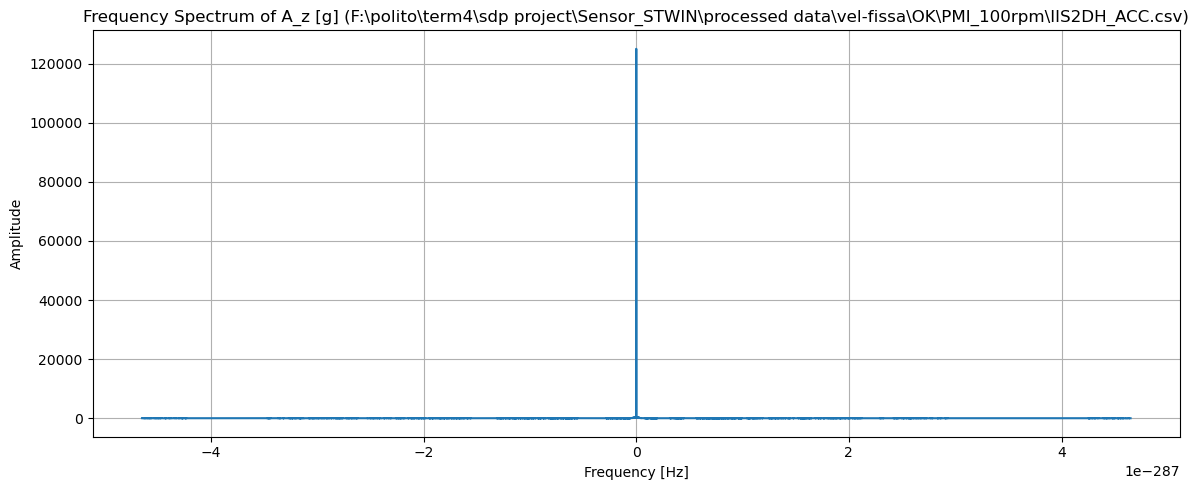

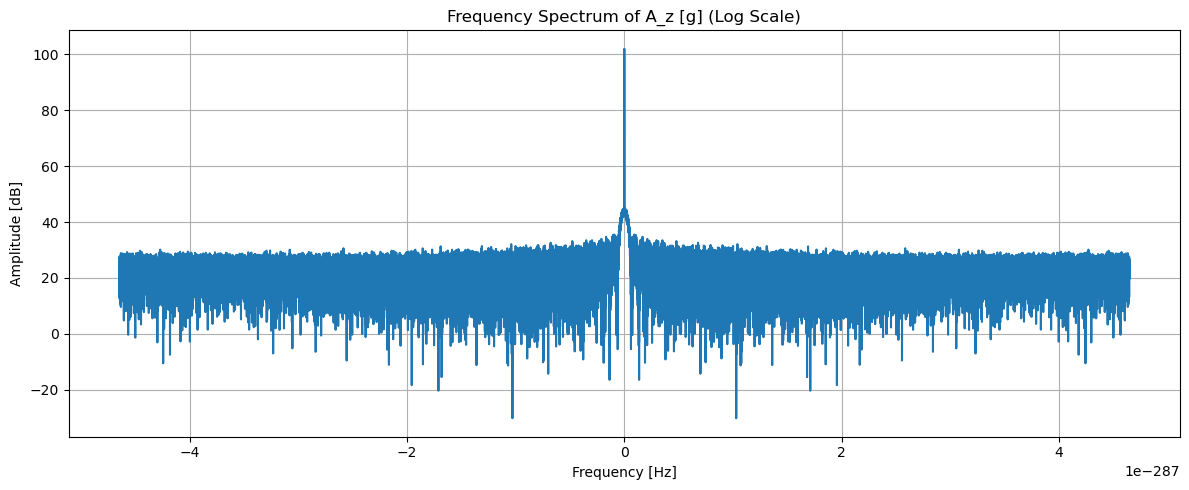

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

def plot_fft(file_path, value_column=None):
    df = pd.read_csv(file_path)

    # Identify time column
    time_cols = [col for col in df.columns if 'time' in col.lower()]
    if not time_cols:
        raise ValueError("No time column found in CSV.")
    time_col = time_cols[0]

    # Identify signal column (use the one you choose or auto-pick first non-time column)
    signal_cols = [col for col in df.columns if col != time_col]
    if not signal_cols:
        raise ValueError("No data columns found in CSV.")

    if value_column and value_column in df.columns:
        signal_col = value_column
    else:
        signal_col = signal_cols[0]  # default to first

    time = df[time_col].values
    signal = df[signal_col].values
    n = len(signal)

    # Sampling interval
    dt = np.mean(np.diff(time))
    fs = 1 / dt

    # FFT and frequencies
    yf = fft(signal)
    xf = fftfreq(n, d=dt)

    # Shift for full spectrum (neg + pos)
    yf_shifted = fftshift(yf)
    xf_shifted = fftshift(xf)

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(xf_shifted, np.abs(yf_shifted), label="|FFT| (Linear Scale)")
    plt.title(f"Frequency Spectrum of {signal_col} ({file_path.split('/')[-1]})")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Log scale version
    plt.figure(figsize=(12, 5))
    plt.plot(xf_shifted, 20 * np.log10(np.abs(yf_shifted) + 1e-9), label="|FFT| (Log Scale)")
    plt.title(f"Frequency Spectrum of {signal_col} (Log Scale)")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude [dB]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Accelerometer Z-axis
plot_fft(r"F:\polito\term4\sdp project\Sensor_STWIN\processed data\vel-fissa\OK\PMI_100rpm\IIS2DH_ACC.csv", value_column="A_z [g]")

# Microphone
# plot_fft("processed_data/KO_LOW_2mm/STWIN_00006/IMP34DT05_MIC.csv")

feature extraction


In [2]:
import pandas as pd

# Load your statistics file
df = pd.read_csv(r"F:\polito\term4\sdp project\all_statistics2.csv")

# Build a feature name: sensor_channel_stat (e.g., IIS3DWB_Z_mean)
df['channel_clean'] = df['channel'].str.replace(r'\[.*?\]', '', regex=True).str.strip()
df['feature'] = df['sensor'] + "_" + df['channel_clean'] + "_" + df.columns[4]

# Pivot to wide format: one row per (label, sample), one column per feature
feature_matrix = df.pivot_table(index=['label', 'sample'], columns='feature', values=df.columns[4])

# Flatten multi-index columns
feature_matrix.columns = feature_matrix.columns.to_flat_index()
feature_matrix.columns = [col if isinstance(col, str) else "_".join(col) for col in feature_matrix.columns]

# Reset index
feature_matrix = feature_matrix.reset_index()

# Replace bad values with NaN
feature_matrix.replace(['#NAME?', 'inf', '=-inf'], pd.NA, inplace=True)

# Option 1 (safe): fill missing values with 0
feature_matrix.fillna(0, inplace=True)

# Option 2 (if 0 distorts data): use column mean
# feature_matrix.fillna(feature_matrix.mean(), inplace=True)

# Save to CSV
feature_matrix.to_csv("feature_matrix2.csv", index=False)
print("✅ Feature matrix saved to feature_matrix2.csv")


✅ Feature matrix saved to feature_matrix2.csv


In [ ]:
import pandas as pd

# 1. خواندن فایل آمار
df = pd.read_csv("all_statistics.csv")

# 2. تمیز کردن نام channel (مثلاً حذف [m/s^2] از Z[m/s^2])
df['channel_clean'] = df['channel'].str.replace(r'\[.*?\]', '', regex=True).str.strip()

# 3. ساخت نام ویژگی‌ها: sensor_channel_stat
# مثلاً: IIS3DWB_Z_mean
stat_cols = ['mean', 'std', 'min', 'max', 'median', 'variance']
long_df = []

for stat in stat_cols:
    temp = df[['label', 'sample', 'sensor', 'channel_clean', stat]].copy()
    temp['feature'] = temp['sensor'] + "_" + temp['channel_clean'] + "_" + stat
    temp = temp[['label', 'sample', 'feature', stat]]
    temp.rename(columns={stat: 'value'}, inplace=True)
    long_df.append(temp)

combined_df = pd.concat(long_df)

# 4. Pivot کردن به شکل ماتریس
feature_matrix = combined_df.pivot_table(index=['label', 'sample'], columns='feature', values='value')

# 5. ریست ایندکس و ذخیره
feature_matrix = feature_matrix.reset_index()

# 6. جایگزینی مقادیر مشکل‌دار
feature_matrix.replace(['#NAME?', 'inf', '-inf'], pd.NA, inplace=True)
feature_matrix.fillna(0, inplace=True)

# 7. ذخیره
feature_matrix.to_csv("feature_matrix.csv", index=False)
print("✅ feature_matrix.csv ساخته شد.")


✅ feature_matrix.csv ساخته شد.


train logistic regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# مرحله 1: آماده‌سازی X و y
X = df.drop(columns=['label', 'sample', 'target'])

# مرحله 2: اطمینان از عددی بودن همه ستون‌ها
X = X.apply(pd.to_numeric, errors='coerce')

# مرحله 3: حذف inf و -inf واقعی (نه فقط رشته‌ای)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# مرحله 4: پر کردن همه NaNها
X = X.fillna(0)

# مرحله 5: نرمال‌سازی
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ نرمال‌سازی بدون خطا انجام شد.")


✅ نرمال‌سازی بدون خطا انجام شد.


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1070: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:83: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


In [ ]:
print("Any inf left:", np.isinf(X.values).any())
print("Any NaN left:", np.isnan(X.values).any())
print("Max value:", np.max(np.abs(X.values)))

Any inf left: False
Any NaN left: False
Max value: 1.0675294524825396e+308


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

def load_and_preprocess_data(file_path):
    """
    Load CSV data and handle problematic values
    """
    print("Loading data...")
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    print(f"Original data shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    # Separate features and target
    X = df.drop(['label', 'sample'], axis=1, errors='ignore')  # Remove non-feature columns
    y = df['label'] if 'label' in df.columns else df.iloc[:, 0]  # First column as target if 'label' not found
    
    print(f"Features shape: {X.shape}")
    print(f"Target distribution:\n{y.value_counts()}")
    
    return X, y

def clean_data(X):
    """
    Handle infinite values, very large numbers, and other data quality issues
    """
    print("\nCleaning data...")
    
    # Convert to numeric, replacing non-numeric values with NaN
    X_clean = X.apply(pd.to_numeric, errors='coerce')
    
    # Handle infinite values
    print(f"Infinite values found: {np.isinf(X_clean.values).sum()}")
    X_clean = X_clean.replace([np.inf, -np.inf], np.nan)
    
    # Handle very large numbers (beyond float64 range)
    # Set threshold for "too large" numbers
    threshold = 1e10
    large_mask = np.abs(X_clean) > threshold
    print(f"Very large values (>{threshold}) found: {large_mask.sum().sum()}")
    X_clean = X_clean.mask(large_mask, np.nan)
    
    # Check for missing values
    missing_count = X_clean.isnull().sum()
    print(f"Missing values per column:\n{missing_count[missing_count > 0]}")
    
    # Handle missing values - fill with median
    X_clean = X_clean.fillna(X_clean.median())
    
    # Remove columns with all NaN values (if any remain)
    X_clean = X_clean.dropna(axis=1, how='all')
    
    print(f"Cleaned data shape: {X_clean.shape}")
    
    return X_clean

def prepare_target(y, binary_mode=True):
    """
    Encode target variable - can be binary or multi-class
    """
    print("\nPreparing target variable...")
    
    if binary_mode:
        # Convert to binary: OK vs KO (any type)
        y_binary = y.apply(lambda x: 'OK' if x == 'OK' else 'KO')
        print(f"Converting to binary classification: OK vs KO")
        print(f"Original classes: {y.unique()}")
        print(f"Binary classes: {y_binary.unique()}")
        
        # Create label encoder for binary
        le = LabelEncoder()
        y_encoded = le.fit_transform(y_binary)
        
        print(f"Label mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
        print(f"Target distribution after encoding:\n{pd.Series(y_encoded).value_counts()}")
        
        return y_encoded, le
    else:
        # Multi-class classification
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
        
        print(f"Multi-class mode - {len(le.classes_)} classes")
        print(f"Label mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
        print(f"Target distribution after encoding:\n{pd.Series(y_encoded).value_counts()}")
        
        return y_encoded, le

def select_features(X_train, y_train, X_val, X_test, k=50):
    """
    Select top k features using statistical tests
    """
    print(f"\nSelecting top {k} features...")
    
    # Use SelectKBest with f_classif
    selector = SelectKBest(score_func=f_classif, k=min(k, X_train.shape[1]))
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_val_selected = selector.transform(X_val)
    X_test_selected = selector.transform(X_test)
    
    # Get selected feature names
    selected_features = X_train.columns[selector.get_support()].tolist()
    print(f"Selected {len(selected_features)} features")
    
    return X_train_selected, X_val_selected, X_test_selected, selected_features, selector

def train_logistic_regression(X_train, y_train, X_val, y_val, is_binary=True):
    """
    Train logistic regression with different regularization parameters
    """
    print("\nTraining Logistic Regression models...")
    
    # Try different C values (inverse of regularization strength)
    C_values = [0.001, 0.01, 0.1, 1, 10, 100]
    best_score = 0
    best_model = None
    best_C = None
    
    for C in C_values:
        # Train model
        if is_binary:
            lr = LogisticRegression(C=C, random_state=42, max_iter=1000)
        else:
            lr = LogisticRegression(C=C, random_state=42, max_iter=1000, multi_class='ovr')
        
        lr.fit(X_train, y_train)
        
        # Validate
        val_score = lr.score(X_val, y_val)
        print(f"C={C}: Validation accuracy = {val_score:.4f}")
        
        if val_score > best_score:
            best_score = val_score
            best_model = lr
            best_C = C
    
    print(f"\nBest model: C={best_C}, Validation accuracy={best_score:.4f}")
    return best_model, best_C

def evaluate_model(model, X_test, y_test, le, selected_features, is_binary=True):
    """
    Evaluate the trained model on test set
    """
    print("\nEvaluating model on test set...")
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # AUC calculation - handle binary vs multi-class
    if is_binary and len(le.classes_) == 2:
        auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        print(f"Test AUC-ROC: {auc:.4f}")
    elif len(le.classes_) > 2:
        try:
            auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
            print(f"Test AUC-ROC (multi-class): {auc:.4f}")
        except:
            auc = None
            print("AUC-ROC: Not calculated (multi-class issue)")
    else:
        auc = None
        print("AUC-ROC: Not applicable")
    
    print(f"Test Accuracy: {accuracy:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print("Classes:", le.classes_)
    print(cm)
    
    # Feature importance
    if hasattr(model, 'coef_'):
        if len(model.coef_.shape) == 1:  # Binary classification
            coefficients = model.coef_[0]
        else:  # Multi-class - use mean absolute coefficients
            coefficients = np.mean(np.abs(model.coef_), axis=0)
        
        feature_importance = pd.DataFrame({
            'feature': selected_features,
            'coefficient': coefficients,
            'abs_coefficient': np.abs(coefficients)
        }).sort_values('abs_coefficient', ascending=False)
        
        print("\nTop 10 Most Important Features:")
        print(feature_importance.head(10))
    else:
        feature_importance = None
    
    return accuracy, auc, feature_importance

def main(binary_classification=True):
    """
    Main function to run the complete pipeline
    Args:
        binary_classification: If True, converts to OK vs KO. If False, keeps all 4 classes.
    """
    # Load and preprocess data
    file_path = r"F:\polito\term4\sdp project\feature_matrix.csv"  # Change this to your CSV file path
    X, y = load_and_preprocess_data(file_path)
    
    # Clean the data
    X_clean = clean_data(X)
    
    # Prepare target variable
    y_encoded, label_encoder = prepare_target(y, binary_mode=binary_classification)
    
    # Check if we have enough samples for each class
    unique_classes, class_counts = np.unique(y_encoded, return_counts=True)
    min_class_count = min(class_counts)
    
    if min_class_count < 3:
        print(f"Warning: Minimum class count is {min_class_count}. Using simple train-test split.")
        # Simple 80-20 split
        X_train, X_test, y_train, y_test = train_test_split(
            X_clean, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )
        X_val, y_val = X_test, y_test  # Use test as validation for hyperparameter tuning
        
        print(f"\nData splits:")
        print(f"Train: {X_train.shape[0]} samples")
        print(f"Test: {X_test.shape[0]} samples")
        
    else:
        # Split data: 60% train, 20% validation, 20% test
        X_temp, X_test, y_temp, y_test = train_test_split(
            X_clean, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )
        
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 * 0.8 = 0.2
        )
        
        print(f"\nData splits:")
        print(f"Train: {X_train.shape[0]} samples")
        print(f"Validation: {X_val.shape[0]} samples") 
        print(f"Test: {X_test.shape[0]} samples")
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert back to DataFrame for feature selection
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    # Feature selection - adjust k based on available samples
    max_features = min(50, X_train.shape[0] // 2, X_train.shape[1])
    X_train_selected, X_val_selected, X_test_selected, selected_features, selector = select_features(
        X_train_scaled, y_train, X_val_scaled, X_test_scaled, k=max_features
    )
    
    # Train model
    is_binary = len(label_encoder.classes_) == 2
    best_model, best_C = train_logistic_regression(
        X_train_selected, y_train, X_val_selected, y_val, is_binary=is_binary
    )
    
    # Evaluate model
    accuracy, auc, feature_importance = evaluate_model(
        best_model, X_test_selected, y_test, label_encoder, selected_features, is_binary=is_binary
    )
    
    # Return trained components for future use
    return {
        'model': best_model,
        'scaler': scaler,
        'selector': selector,
        'label_encoder': label_encoder,
        'selected_features': selected_features,
        'best_C': best_C,
        'test_accuracy': accuracy,
        'test_auc': auc,
        'feature_importance': feature_importance,
        'is_binary': is_binary
    }

def predict_new_data(new_data, trained_components):
    """
    Function to make predictions on new data using trained model
    """
    # Extract components
    model = trained_components['model']
    scaler = trained_components['scaler']
    selector = trained_components['selector']
    label_encoder = trained_components['label_encoder']
    
    # Preprocess new data
    new_data_clean = clean_data(new_data)
    new_data_scaled = scaler.transform(new_data_clean)
    new_data_selected = selector.transform(new_data_scaled)
    
    # Make predictions
    predictions = model.predict(new_data_selected)
    probabilities = model.predict_proba(new_data_selected)
    
    # Convert back to original labels
    predicted_labels = label_encoder.inverse_transform(predictions)
    
    return predicted_labels, probabilities

if __name__ == "__main__":
    print("="*60)
    print("SENSOR DATA BINARY CLASSIFICATION")
    print("="*60)
    
    # Run binary classification (OK vs KO)
    print("\n1. BINARY CLASSIFICATION (OK vs KO)")
    print("-" * 40)
    trained_components_binary = main(binary_classification=True)
    
    print("\n" + "="*50)
    print("BINARY CLASSIFICATION RESULTS:")
    print("="*50)
    print(f"Final Test Accuracy: {trained_components_binary['test_accuracy']:.4f}")
    if trained_components_binary['test_auc'] is not None:
        print(f"Final Test AUC: {trained_components_binary['test_auc']:.4f}")
    print(f"Best regularization parameter C: {trained_components_binary['best_C']}")
    print(f"Number of selected features: {len(trained_components_binary['selected_features'])}")
    
    print("\n" + "="*60)
    print("SENSOR DATA MULTI-CLASS CLASSIFICATION")
    print("="*60)
    
    # Run multi-class classification (all 4 classes)
    print("\n2. MULTI-CLASS CLASSIFICATION (All 4 classes)")
    print("-" * 40)
    trained_components_multi = main(binary_classification=False)
    
    print("\n" + "="*50)
    print("MULTI-CLASS CLASSIFICATION RESULTS:")
    print("="*50)
    print(f"Final Test Accuracy: {trained_components_multi['test_accuracy']:.4f}")
    if trained_components_multi['test_auc'] is not None:
        print(f"Final Test AUC: {trained_components_multi['test_auc']:.4f}")
    print(f"Best regularization parameter C: {trained_components_multi['best_C']}")
    print(f"Number of selected features: {len(trained_components_multi['selected_features'])}")
    
    print("\n" + "="*60)
    print("TRAINING COMPLETED SUCCESSFULLY!")
    print("Both binary and multi-class models are available.")
    print("="*60)

SENSOR DATA BINARY CLASSIFICATION

1. BINARY CLASSIFICATION (OK vs KO)
----------------------------------------
Loading data...
Original data shape: (48, 206)
Columns: ['label', 'sample', 'HTS221_HUM_HUM_max', 'HTS221_HUM_HUM_mean', 'HTS221_HUM_HUM_median', 'HTS221_HUM_HUM_min', 'HTS221_HUM_HUM_std', 'HTS221_HUM_HUM_variance', 'HTS221_HUM_Time_max', 'HTS221_HUM_Time_mean', 'HTS221_HUM_Time_median', 'HTS221_HUM_Time_min', 'HTS221_HUM_Time_std', 'HTS221_HUM_Time_variance', 'HTS221_TEMP_TEMP_max', 'HTS221_TEMP_TEMP_mean', 'HTS221_TEMP_TEMP_median', 'HTS221_TEMP_TEMP_min', 'HTS221_TEMP_TEMP_std', 'HTS221_TEMP_TEMP_variance', 'HTS221_TEMP_Time_max', 'HTS221_TEMP_Time_mean', 'HTS221_TEMP_Time_median', 'HTS221_TEMP_Time_min', 'HTS221_TEMP_Time_std', 'HTS221_TEMP_Time_variance', 'IIS2DH_ACC_A_x_max', 'IIS2DH_ACC_A_x_mean', 'IIS2DH_ACC_A_x_median', 'IIS2DH_ACC_A_x_min', 'IIS2DH_ACC_A_x_std', 'IIS2DH_ACC_A_x_variance', 'IIS2DH_ACC_A_y_max', 'IIS2DH_ACC_A_y_mean', 'IIS2DH_ACC_A_y_median', 'IIS2DH

🚀 Testing Statistical AI Agent
✅ Loaded feature matrix: (48, 206)
📊 Calculating class-wise statistics...
✅ Calculated statistics for 204 features
🤖 Training discrimination models...
✅ logistic_regression: Accuracy = 0.7500
❌ Failed to train random_forest: Input X contains infinity or a value too large for dtype('float32').
📊 ANALYSIS SUMMARY:
Dataset: {'total_samples': 48, 'features_count': 204, 'ok_samples': 12, 'ko_samples': 36}

Top 3 Discriminative Features:
1. IIS3DWB_ACC_A_y_median: KO higher by 0.0043
2. IIS3DWB_ACC_A_z_median: OK higher by 0.0074
3. IIS2DH_ACC_A_z_median: OK higher by 0.036

Model Accuracies:
- logistic_regression: 0.7500

Insights:
- The most discriminative feature is 'IIS3DWB_ACC_A_y_median' from sensor 'IIS3DWB'
- This feature shows KO higher by 0.0043 with a separation score of 6.9573
- Found 10 statistically significant discriminative features

🎨 Testing plot generation...


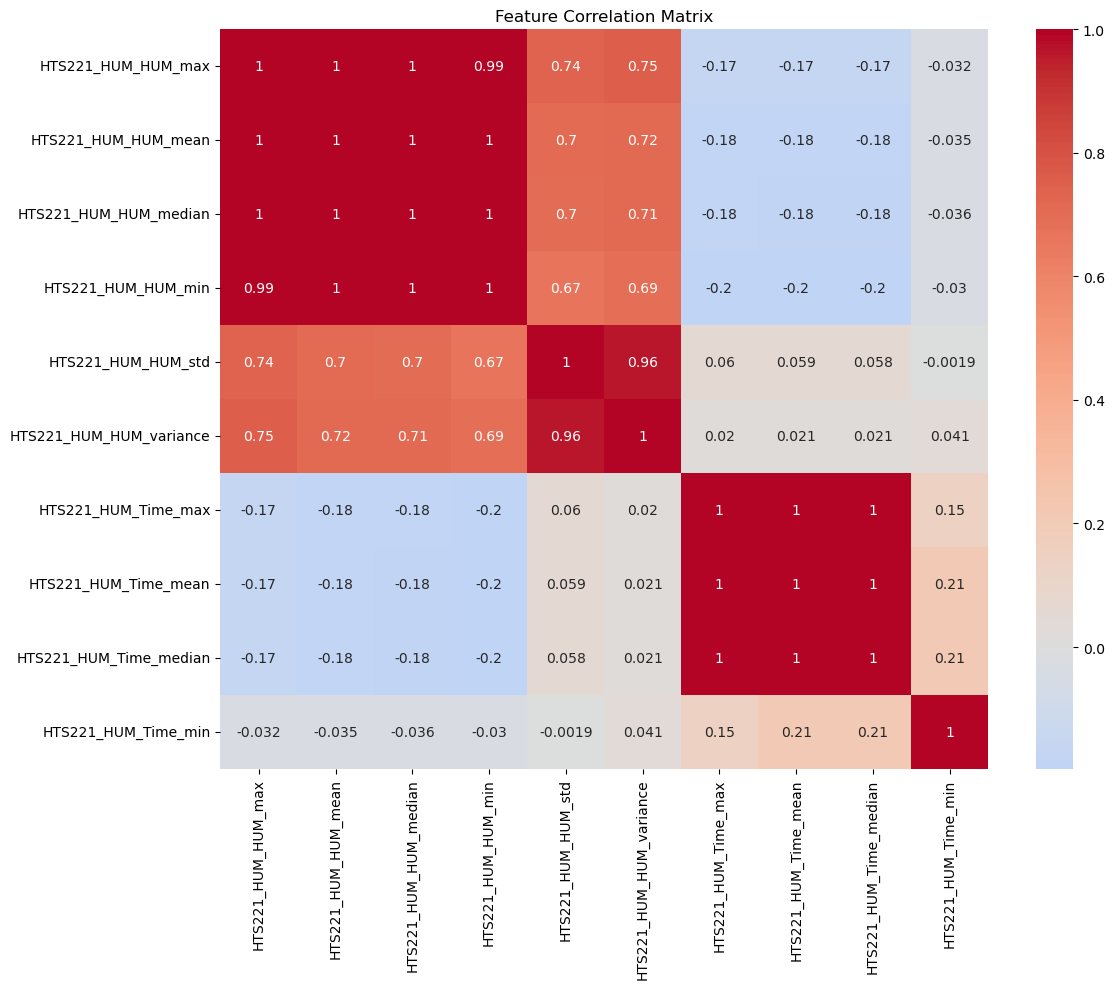

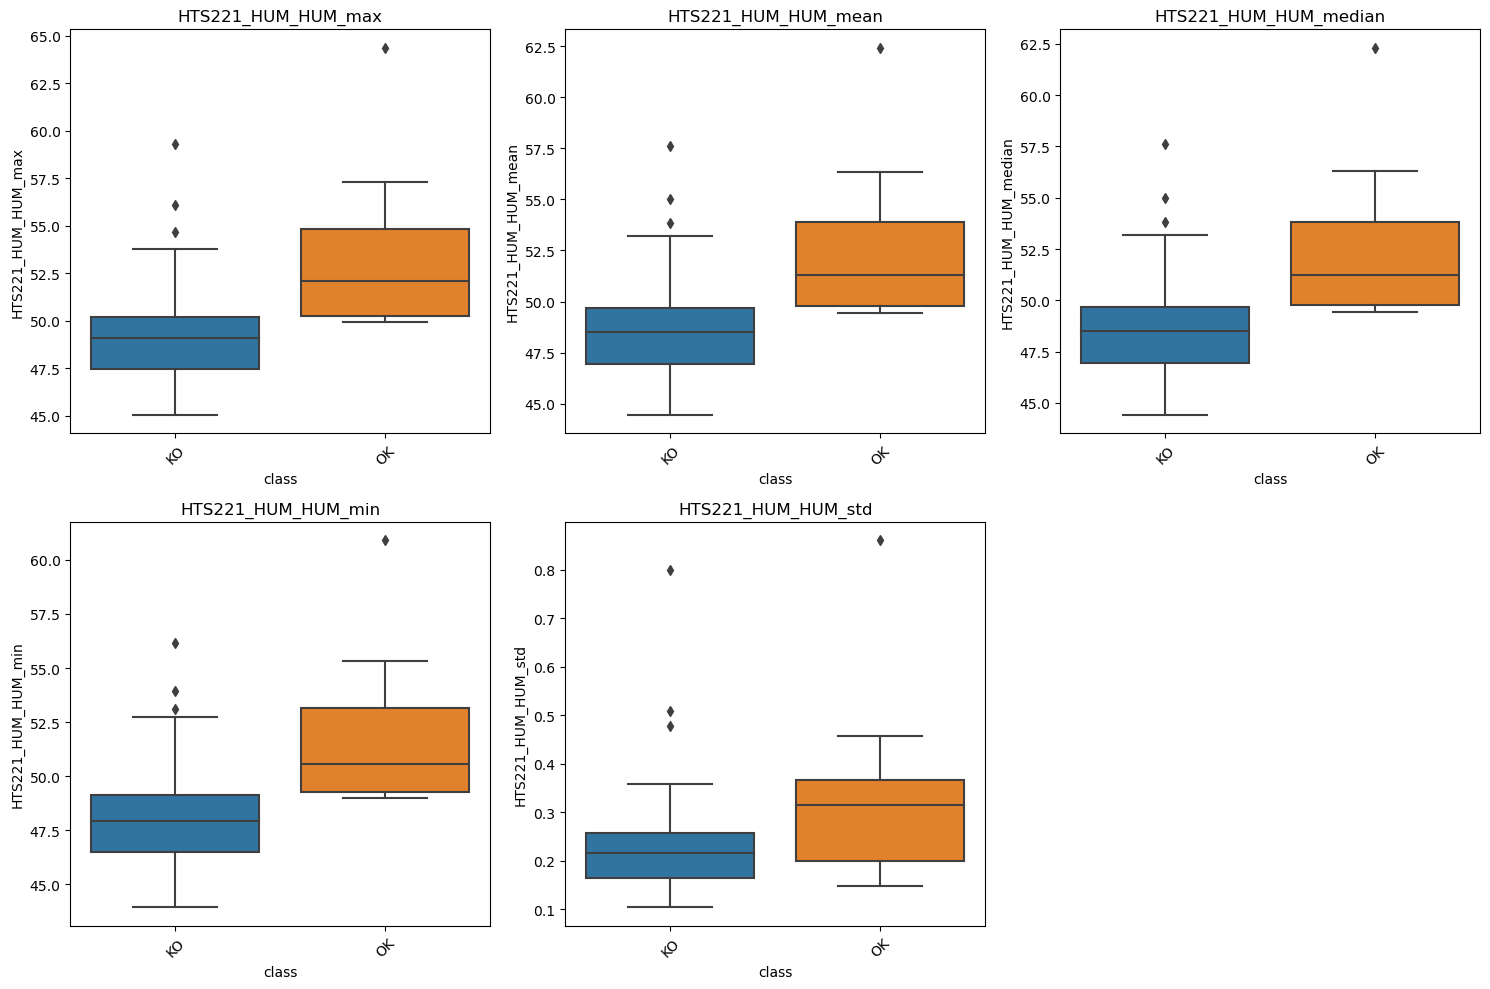

In [ ]:
# ============================================================================
# TASK 1: ENHANCED STATISTICAL ANALYSIS ENGINE
# ============================================================================

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

class StatisticalAnalysisEngine:
    """
    Core engine for statistical analysis and feature discrimination
    """
    
    def __init__(self):
        self.feature_matrix = None
        self.statistical_results = {}
        self.best_discriminative_features = []
        self.models = {}
        
    def load_feature_matrix(self, file_path):
        """Load your feature matrix"""
        self.feature_matrix = pd.read_csv(file_path)
        print(f"✅ Loaded feature matrix: {self.feature_matrix.shape}")
        return self.feature_matrix
    
    def calculate_class_statistics(self):
        """
        Calculate comprehensive statistics for each class (OK vs KO)
        This is what the GUI will display as "best statistical indices"
        """
        print("📊 Calculating class-wise statistics...")
        
        # Separate features and labels
        X = self.feature_matrix.drop(['label', 'sample'], axis=1, errors='ignore')
        y = self.feature_matrix['label']
        
        # Convert to binary if needed
        y_binary = y.apply(lambda x: 'OK' if x == 'OK' else 'KO')
        
        results = {}
        
        for feature in X.columns:
            feature_data = X[feature]
            
            # Skip if all NaN
            if feature_data.isna().all():
                continue
                
            ok_data = feature_data[y_binary == 'OK'].dropna()
            ko_data = feature_data[y_binary == 'KO'].dropna()
            
            if len(ok_data) == 0 or len(ko_data) == 0:
                continue
            
            # Calculate statistics for each class
            ok_stats = {
                'mean': ok_data.mean(),
                'std': ok_data.std(),
                'median': ok_data.median(),
                'min': ok_data.min(),
                'max': ok_data.max()
            }
            
            ko_stats = {
                'mean': ko_data.mean(),
                'std': ko_data.std(),
                'median': ko_data.median(),
                'min': ko_data.min(),
                'max': ko_data.max()
            }
            
            # Calculate discrimination metrics
            try:
                # T-test for mean difference
                t_stat, p_value = stats.ttest_ind(ok_data, ko_data)
                
                # Effect size (Cohen's d)
                pooled_std = np.sqrt(((len(ok_data)-1)*ok_stats['std']**2 + 
                                    (len(ko_data)-1)*ko_stats['std']**2) / 
                                   (len(ok_data)+len(ko_data)-2))
                cohens_d = abs(ok_stats['mean'] - ko_stats['mean']) / pooled_std if pooled_std > 0 else 0
                
                # Separation score (custom metric)
                separation_score = cohens_d * (1 - p_value) if p_value < 1 else 0
                
                results[feature] = {
                    'OK_stats': ok_stats,
                    'KO_stats': ko_stats,
                    't_statistic': abs(t_stat),
                    'p_value': p_value,
                    'cohens_d': cohens_d,
                    'separation_score': separation_score,
                    'significant': p_value < 0.05
                }
                
            except Exception as e:
                continue
        
        # Sort by separation score
        self.statistical_results = dict(sorted(results.items(), 
                                             key=lambda x: x[1]['separation_score'], 
                                             reverse=True))
        
        print(f"✅ Calculated statistics for {len(self.statistical_results)} features")
        return self.statistical_results
    
    def get_best_discriminative_features(self, top_n=10):
        """
        Return the top N features that best discriminate between OK and KO
        """
        if not self.statistical_results:
            self.calculate_class_statistics()
        
        # Get top features by separation score
        top_features = list(self.statistical_results.keys())[:top_n]
        
        best_features_info = []
        for feature in top_features:
            stats_info = self.statistical_results[feature]
            
            # Create human-readable summary
            ok_mean = stats_info['OK_stats']['mean']
            ko_mean = stats_info['KO_stats']['mean']
            separation = stats_info['separation_score']
            significance = "Significant" if stats_info['significant'] else "Not significant"
            
            best_features_info.append({
                'feature_name': feature,
                'sensor_type': feature.split('_')[0],  # Extract sensor name
                'OK_mean': round(ok_mean, 4),
                'KO_mean': round(ko_mean, 4),
                'difference': round(abs(ok_mean - ko_mean), 4),
                'separation_score': round(separation, 4),
                'statistical_significance': significance,
                'interpretation': f"{'OK higher' if ok_mean > ko_mean else 'KO higher'} by {round(abs(ok_mean - ko_mean), 4)}"
            })
        
        self.best_discriminative_features = best_features_info
        return best_features_info
    
    def train_discrimination_models(self):
        """
        Train multiple models to identify discriminative patterns
        """
        print("🤖 Training discrimination models...")
        
        X = self.feature_matrix.drop(['label', 'sample'], axis=1, errors='ignore')
        y = self.feature_matrix['label'].apply(lambda x: 'OK' if x == 'OK' else 'KO')
        
        # Clean data
        X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())
        
        # Train different models
        models_to_train = {
            'logistic_regression': LogisticRegression(random_state=42, max_iter=1000),
            'random_forest': RandomForestClassifier(n_estimators=100, random_state=42)
        }
        
        results = {}
        
        for name, model in models_to_train.items():
            try:
                model.fit(X, y)
                y_pred = model.predict(X)
                accuracy = accuracy_score(y, y_pred)
                
                # Get feature importance
                if hasattr(model, 'feature_importances_'):
                    importance = model.feature_importances_
                elif hasattr(model, 'coef_'):
                    importance = np.abs(model.coef_[0])
                else:
                    importance = np.zeros(X.shape[1])
                
                # Get top important features
                feature_importance = pd.DataFrame({
                    'feature': X.columns,
                    'importance': importance
                }).sort_values('importance', ascending=False)
                
                results[name] = {
                    'model': model,
                    'accuracy': accuracy,
                    'feature_importance': feature_importance.head(10).to_dict('records')
                }
                
                print(f"✅ {name}: Accuracy = {accuracy:.4f}")
                
            except Exception as e:
                print(f"❌ Failed to train {name}: {e}")
                continue
        
        self.models = results
        return results

# ============================================================================
# TASK 2: PLOTTING ENGINE FOR CHAT REQUESTS
# ============================================================================

class PlottingEngine:
    """
    Engine to generate plots based on natural language requests
    This will be called by your teammate's LLM interface
    """
    
    def __init__(self, feature_matrix, original_data_path=None):
        self.feature_matrix = feature_matrix
        self.original_data_path = original_data_path
        
    def plot_feature_comparison(self, feature_name, plot_type='boxplot'):
        """
        Compare a feature between OK and KO classes
        """
        if feature_name not in self.feature_matrix.columns:
            return f"❌ Feature '{feature_name}' not found"
        
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Prepare data
        data = self.feature_matrix.copy()
        data['class'] = data['label'].apply(lambda x: 'OK' if x == 'OK' else 'KO')
        
        if plot_type == 'boxplot':
            sns.boxplot(data=data, x='class', y=feature_name, ax=ax)
            ax.set_title(f'Boxplot: {feature_name} by Class')
        
        elif plot_type == 'histogram':
            for class_name in ['OK', 'KO']:
                class_data = data[data['class'] == class_name][feature_name].dropna()
                ax.hist(class_data, alpha=0.7, label=class_name, bins=20)
            ax.set_xlabel(feature_name)
            ax.set_ylabel('Frequency')
            ax.set_title(f'Histogram: {feature_name} by Class')
            ax.legend()
        
        elif plot_type == 'violin':
            sns.violinplot(data=data, x='class', y=feature_name, ax=ax)
            ax.set_title(f'Violin Plot: {feature_name} by Class')
        
        plt.tight_layout()
        return fig
    
    def plot_top_discriminative_features(self, top_n=5):
        """
        Plot the top N most discriminative features
        """
        # This would use the results from StatisticalAnalysisEngine
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.ravel()
        
        # Get top features (this should come from your statistical analysis)
        # For now, just plot first few numeric columns
        numeric_cols = self.feature_matrix.select_dtypes(include=[np.number]).columns[:top_n]
        
        for i, feature in enumerate(numeric_cols):
            if i >= len(axes):
                break
                
            data = self.feature_matrix.copy()
            data['class'] = data['label'].apply(lambda x: 'OK' if x == 'OK' else 'KO')
            
            sns.boxplot(data=data, x='class', y=feature, ax=axes[i])
            axes[i].set_title(f'{feature}')
            axes[i].tick_params(axis='x', rotation=45)
        
        # Hide unused subplots
        for i in range(len(numeric_cols), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        return fig
    
    def plot_correlation_matrix(self, features_list=None):
        """
        Plot correlation matrix of selected features
        """
        if features_list is None:
            # Use top 10 numeric features
            numeric_data = self.feature_matrix.select_dtypes(include=[np.number])
            features_list = numeric_data.columns[:10].tolist()
        
        correlation_data = self.feature_matrix[features_list].corr()
        
        fig, ax = plt.subplots(figsize=(12, 10))
        sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, ax=ax)
        ax.set_title('Feature Correlation Matrix')
        plt.tight_layout()
        return fig

# ============================================================================
# TASK 3: API FOR GUI INTEGRATION
# ============================================================================

class StatisticalAgent:
    """
    Main class that your teammate's GUI will interact with
    """
    
    def __init__(self, feature_matrix_path):
        self.stats_engine = StatisticalAnalysisEngine()
        self.feature_matrix = self.stats_engine.load_feature_matrix(feature_matrix_path)
        self.plotting_engine = PlottingEngine(self.feature_matrix)
        
        # Run initial analysis
        self.stats_engine.calculate_class_statistics()
        self.stats_engine.train_discrimination_models()
    
    def get_analysis_summary(self):
        """
        Return complete analysis summary for GUI display
        """
        best_features = self.stats_engine.get_best_discriminative_features(10)
        model_results = self.stats_engine.models
        
        summary = {
            'dataset_info': {
                'total_samples': len(self.feature_matrix),
                'features_count': len(self.feature_matrix.columns) - 2,  # exclude label, sample
                'ok_samples': len(self.feature_matrix[self.feature_matrix['label'] == 'OK']),
                'ko_samples': len(self.feature_matrix[self.feature_matrix['label'] != 'OK'])
            },
            'best_discriminative_features': best_features,
            'model_performance': {
                name: {'accuracy': results['accuracy']} 
                for name, results in model_results.items()
            },
            'statistical_insights': self._generate_insights(best_features)
        }
        
        return summary
    
    def _generate_insights(self, best_features):
        """Generate human-readable insights"""
        insights = []
        
        if len(best_features) > 0:
            top_feature = best_features[0]
            insights.append(f"The most discriminative feature is '{top_feature['feature_name']}' from sensor '{top_feature['sensor_type']}'")
            insights.append(f"This feature shows {top_feature['interpretation']} with a separation score of {top_feature['separation_score']}")
        
        significant_features = [f for f in best_features if f['statistical_significance'] == 'Significant']
        insights.append(f"Found {len(significant_features)} statistically significant discriminative features")
        
        return insights
    
    def handle_plot_request(self, request_text):
        """
        Handle natural language plot requests
        This is what your teammate's LLM will call
        """
        request_lower = request_text.lower()
        
        # Simple keyword matching (your teammate's LLM can make this more sophisticated)
        if 'correlation' in request_lower:
            return self.plotting_engine.plot_correlation_matrix()
        
        elif 'top features' in request_lower or 'best features' in request_lower:
            return self.plotting_engine.plot_top_discriminative_features()
        
        elif 'boxplot' in request_lower:
            # Extract feature name (simplified - LLM should do this better)
            feature_names = [col for col in self.feature_matrix.columns if col in request_text]
            if feature_names:
                return self.plotting_engine.plot_feature_comparison(feature_names[0], 'boxplot')
        
        elif 'histogram' in request_lower:
            feature_names = [col for col in self.feature_matrix.columns if col in request_text]
            if feature_names:
                return self.plotting_engine.plot_feature_comparison(feature_names[0], 'histogram')
        
        return None  # LLM should handle this case

# ============================================================================
# TASK 4: MAIN EXECUTION AND TESTING
# ============================================================================

def main():
    """
    Test your complete system
    """
    print("🚀 Testing Statistical AI Agent")
    print("=" * 50)
    
    # Initialize the agent
    agent = StatisticalAgent("feature_matrix.csv")  # Your CSV file
    
    # Get analysis summary
    summary = agent.get_analysis_summary()
    
    print("📊 ANALYSIS SUMMARY:")
    print(f"Dataset: {summary['dataset_info']}")
    print(f"\nTop 3 Discriminative Features:")
    for i, feature in enumerate(summary['best_discriminative_features'][:3], 1):
        print(f"{i}. {feature['feature_name']}: {feature['interpretation']}")
    
    print(f"\nModel Accuracies:")
    for model, perf in summary['model_performance'].items():
        print(f"- {model}: {perf['accuracy']:.4f}")
    
    print(f"\nInsights:")
    for insight in summary['statistical_insights']:
        print(f"- {insight}")
    
    # Test plot generation
    print("\n🎨 Testing plot generation...")
    
    # Generate some example plots
    fig1 = agent.handle_plot_request("show correlation matrix")
    fig2 = agent.handle_plot_request("plot top features")
    
    if fig1:
        plt.show()
    if fig2:
        plt.show()

if __name__ == "__main__":
    # Make sure your feature_matrix.csv is in the same directory
    main()

80% done with your part

In [ ]:
# ============================================================================
# PHASE 2: STATISTICAL ANALYSIS ENGINE
# ============================================================================

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

class StatisticalAnalysisEngine:
    """
    Core engine for statistical analysis and feature discrimination
    This is the brain of your AI Agent!
    """
    
    def __init__(self, feature_matrix_path):
        """Initialize with your feature matrix CSV"""
        print("🚀 Initializing Statistical Analysis Engine...")
        
        # Load your feature matrix
        self.feature_matrix = pd.read_csv(feature_matrix_path)
        print(f"✅ Loaded feature matrix: {self.feature_matrix.shape}")
        
        # Initialize storage for results
        self.class_statistics = {}
        self.discriminative_features = []
        self.model_results = {}
        self.insights = []
        
        # Display basic info
        self._display_dataset_info()
    
    def _display_dataset_info(self):
        """Show basic information about the dataset"""
        print("\n📊 DATASET INFORMATION:")
        print(f"Total samples: {len(self.feature_matrix)}")
        print(f"Total features: {len(self.feature_matrix.columns) - 2}")  # exclude label, sample
        
        # Show class distribution
        print(f"\nClass distribution:")
        class_counts = self.feature_matrix['label'].value_counts()
        for class_name, count in class_counts.items():
            print(f"  {class_name}: {count} samples")
        
        # Show sample features
        feature_cols = [col for col in self.feature_matrix.columns if col not in ['label', 'sample']]
        print(f"\nExample features: {feature_cols[:5]}...")
    
    def calculate_class_statistics(self, binary_mode=True):
        """
        Step 2.1: Calculate comprehensive statistics for each class
        This identifies which features differ most between OK and KO
        """
        print("\n🔍 STEP 2.1: Calculating Class-wise Statistics...")
        
        # Prepare data
        X = self.feature_matrix.drop(['label', 'sample'], axis=1, errors='ignore')
        y = self.feature_matrix['label']
        
        # Convert to binary classification if requested
        if binary_mode:
            y_processed = y.apply(lambda x: 'OK' if x == 'OK' else 'KO')
            print("Using binary classification: OK vs KO")
        else:
            y_processed = y
            print("Using multi-class classification")
        
        # Clean data
        X_clean = self._clean_features(X)
        
        # Calculate statistics for each feature
        feature_stats = {}
        
        for feature in X_clean.columns:
            try:
                feature_data = X_clean[feature]
                
                # Skip if all NaN or constant
                if feature_data.isna().all() or feature_data.nunique() <= 1:
                    continue
                
                # Get data for each class
                class_data = {}
                for class_name in y_processed.unique():
                    class_mask = y_processed == class_name
                    class_values = feature_data[class_mask].dropna()
                    
                    if len(class_values) == 0:
                        continue
                    
                    class_data[class_name] = {
                        'values': class_values,
                        'mean': class_values.mean(),
                        'std': class_values.std(),
                        'median': class_values.median(),
                        'min': class_values.min(),
                        'max': class_values.max(),
                        'count': len(class_values)
                    }
                
                # Skip if we don't have data for at least 2 classes
                if len(class_data) < 2:
                    continue
                
                # Calculate discrimination metrics
                discrimination_metrics = self._calculate_discrimination_metrics(class_data, feature)
                
                feature_stats[feature] = {
                    'class_statistics': class_data,
                    'discrimination_metrics': discrimination_metrics
                }
                
            except Exception as e:
                print(f"⚠️  Warning: Could not process feature {feature}: {e}")
                continue
        
        # Sort features by discrimination power
        sorted_features = sorted(feature_stats.items(), 
                               key=lambda x: x[1]['discrimination_metrics']['separation_score'], 
                               reverse=True)
        
        self.class_statistics = dict(sorted_features)
        
        print(f"Calculated statistics for {len(self.class_statistics)} features")
        print(f"Top 3 most discriminative features:")
        
        for i, (feature, stats) in enumerate(list(self.class_statistics.items())[:3], 1):
            score = stats['discrimination_metrics']['separation_score']
            print(f"   {i}. {feature}: separation_score = {score:.4f}")
        
        return self.class_statistics
    
    def _clean_features(self, X):
        """Clean feature data"""
        print("Cleaning feature data...")
        
        # Convert to numeric
        X_clean = X.apply(pd.to_numeric, errors='coerce')
        
        # Handle infinite values
        inf_count = np.isinf(X_clean.values).sum()
        if inf_count > 0:
            print(f"   Replacing {inf_count} infinite values with NaN")
        X_clean = X_clean.replace([np.inf, -np.inf], np.nan)
        
        # Handle very large numbers
        threshold = 1e10
        large_count = (np.abs(X_clean) > threshold).sum().sum()
        if large_count > 0:
            print(f"   Replacing {large_count} very large values (>{threshold}) with NaN")
        X_clean = X_clean.mask(np.abs(X_clean) > threshold, np.nan)
        
        # Fill missing values with median
        missing_before = X_clean.isnull().sum().sum()
        X_clean = X_clean.fillna(X_clean.median())
        X_clean = X_clean.fillna(0)  # If median is also NaN
        
        if missing_before > 0:
            print(f"   Filled {missing_before} missing values with median")
        
        return X_clean
    
    def _calculate_discrimination_metrics(self, class_data, feature_name):
        """Calculate how well a feature discriminates between classes"""
        
        # For binary classification (OK vs KO)
        if len(class_data) == 2:
            classes = list(class_data.keys())
            class1_data = class_data[classes[0]]['values']
            class2_data = class_data[classes[1]]['values']
            
            # Statistical significance test
            try:
                t_stat, p_value = stats.ttest_ind(class1_data, class2_data)
                mannwhitney_stat, mannwhitney_p = stats.mannwhitneyu(class1_data, class2_data, alternative='two-sided')
            except:
                t_stat, p_value = 0, 1
                mannwhitney_stat, mannwhitney_p = 0, 1
            
            # Effect size (Cohen's d)
            mean1, mean2 = class1_data.mean(), class2_data.mean()
            std1, std2 = class1_data.std(), class2_data.std()
            
            # Pooled standard deviation
            n1, n2 = len(class1_data), len(class2_data)
            pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1+n2-2))
            
            cohens_d = abs(mean1 - mean2) / pooled_std if pooled_std > 0 else 0
            
            # Custom separation score (combines effect size and significance)
            separation_score = cohens_d * (1 - p_value) if p_value < 1 else 0
            
            # Interpretation
            effect_interpretation = self._interpret_effect_size(cohens_d)
            significance_interpretation = "Significant" if p_value < 0.05 else "Not significant"
            
            # Mean difference and direction
            mean_difference = abs(mean1 - mean2)
            higher_class = classes[0] if mean1 > mean2 else classes[1]
            
            return {
                'separation_score': separation_score,
                'cohens_d': cohens_d,
                'effect_size_interpretation': effect_interpretation,
                'p_value': p_value,
                'statistical_significance': significance_interpretation,
                'mean_difference': mean_difference,
                'higher_mean_class': higher_class,
                't_statistic': abs(t_stat),
                'mannwhitney_p': mannwhitney_p,
                'classes_compared': classes
            }
        
        else:
            # Multi-class discrimination (simplified)
            all_values = []
            class_means = []
            
            for class_name, data in class_data.items():
                all_values.extend(data['values'].tolist())
                class_means.append(data['mean'])
            
            # ANOVA F-statistic
            try:
                class_values = [data['values'].tolist() for data in class_data.values()]
                f_stat, anova_p = stats.f_oneway(*class_values)
            except:
                f_stat, anova_p = 0, 1
            
            # Variance between classes vs within classes
            between_class_var = np.var(class_means)
            total_var = np.var(all_values)
            separation_score = (between_class_var / total_var) * (1 - anova_p) if total_var > 0 else 0
            
            return {
                'separation_score': separation_score,
                'f_statistic': f_stat,
                'anova_p_value': anova_p,
                'statistical_significance': "Significant" if anova_p < 0.05 else "Not significant",
                'between_class_variance': between_class_var,
                'total_variance': total_var
            }
    
    def _interpret_effect_size(self, cohens_d):
        """Interpret Cohen's d effect size"""
        if cohens_d < 0.2:
            return "Small effect"
        elif cohens_d < 0.5:
            return "Small to medium effect"
        elif cohens_d < 0.8:
            return "Medium to large effect"
        else:
            return "Large effect"
    
    def get_best_discriminative_features(self, top_n=10, min_separation_score=0.01):
        """
        Step 2.2: Get the top N features that best discriminate between classes
        This is what the GUI will display as "best statistical indices"
        """
        print(f"\n🏆 STEP 2.2: Getting Top {top_n} Discriminative Features...")
        
        if not self.class_statistics:
            print("⚠️  No class statistics available. Running analysis first...")
            self.calculate_class_statistics()
        
        # Filter features by minimum separation score
        filtered_features = {
            feature: stats for feature, stats in self.class_statistics.items()
            if stats['discrimination_metrics']['separation_score'] >= min_separation_score
        }
        
        print(f"📊 Found {len(filtered_features)} features with separation_score >= {min_separation_score}")
        
        # Get top N features
        top_features = list(filtered_features.items())[:top_n]
        
        # Format results for GUI display
        discriminative_features = []
        
        for i, (feature, stats) in enumerate(top_features, 1):
            class_stats = stats['class_statistics']
            disc_metrics = stats['discrimination_metrics']
            
            # Extract sensor information
            sensor_parts = feature.split('_')
            sensor_name = sensor_parts[0] if len(sensor_parts) > 0 else "Unknown"
            channel = '_'.join(sensor_parts[1:-1]) if len(sensor_parts) > 2 else "Unknown"
            statistic = sensor_parts[-1] if len(sensor_parts) > 0 else "Unknown"
            
            # Create feature summary
            feature_info = {
                'rank': i,
                'feature_name': feature,
                'sensor_name': sensor_name,
                'channel': channel,
                'statistic_type': statistic,
                'separation_score': round(disc_metrics['separation_score'], 4),
                'effect_size': round(disc_metrics.get('cohens_d', 0), 4),
                'effect_interpretation': disc_metrics.get('effect_size_interpretation', 'N/A'),
                'statistical_significance': disc_metrics['statistical_significance'],
                'p_value': round(disc_metrics.get('p_value', 1), 6)
            }
            
            # Add class-specific information
            if 'classes_compared' in disc_metrics:
                classes = disc_metrics['classes_compared']
                feature_info['classes_compared'] = classes
                
                # Add mean values for each class
                for class_name in classes:
                    if class_name in class_stats:
                        feature_info[f'{class_name}_mean'] = round(class_stats[class_name]['mean'], 4)
                        feature_info[f'{class_name}_std'] = round(class_stats[class_name]['std'], 4)
                
                # Add interpretation
                if len(classes) == 2:
                    higher_class = disc_metrics['higher_mean_class']
                    mean_diff = disc_metrics['mean_difference']
                    feature_info['interpretation'] = f"{higher_class} has higher values (diff: {mean_diff:.4f})"
            
            discriminative_features.append(feature_info)
        
        self.discriminative_features = discriminative_features
        
        # Display results
        print(f"✅ Top {len(discriminative_features)} discriminative features:")
        print(f"{'Rank':<4} {'Feature':<40} {'Sensor':<15} {'Sep.Score':<10} {'Significance':<15}")
        print("-" * 90)
        
        for feature in discriminative_features[:5]:  # Show top 5
            print(f"{feature['rank']:<4} {feature['feature_name'][:38]:<40} {feature['sensor_name']:<15} "
                  f"{feature['separation_score']:<10} {feature['statistical_significance']:<15}")
        
        if len(discriminative_features) > 5:
            print(f"... and {len(discriminative_features) - 5} more features")
        
        return discriminative_features
    
    def train_discrimination_models(self):
        """
        Step 2.3: Train ML models to validate feature importance
        This provides an additional perspective on discriminative features
        """
        print(f"\n🤖 STEP 2.3: Training ML Models for Feature Validation...")
        
        # Prepare data
        X = self.feature_matrix.drop(['label', 'sample'], axis=1, errors='ignore')
        y = self.feature_matrix['label'].apply(lambda x: 'OK' if x == 'OK' else 'KO')
        
        # Clean data
        X_clean = self._clean_features(X)
        
        # Encode labels
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
        
        # Split data
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X_clean, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
            )
        except ValueError:
            # If stratification fails (very small dataset), use simple split
            X_train, X_test, y_train, y_test = train_test_split(
                X_clean, y_encoded, test_size=0.3, random_state=42
            )
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train different models
        models = {
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
        }
        
        model_results = {}
        
        for name, model in models.items():
            try:
                print(f"   Training {name}...")
                
                # Train model
                if name == 'Logistic Regression':
                    model.fit(X_train_scaled, y_train)
                    y_pred = model.predict(X_test_scaled)
                else:
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                
                # Calculate accuracy
                accuracy = accuracy_score(y_test, y_pred)
                
                # Get feature importance
                if hasattr(model, 'feature_importances_'):
                    importance = model.feature_importances_
                elif hasattr(model, 'coef_'):
                    importance = np.abs(model.coef_[0])
                else:
                    importance = np.ones(X_clean.shape[1])
                
                # Create feature importance dataframe
                feature_importance = pd.DataFrame({
                    'feature': X_clean.columns,
                    'importance': importance
                }).sort_values('importance', ascending=False)
                
                model_results[name] = {
                    'model': model,
                    'accuracy': accuracy,
                    'feature_importance': feature_importance.head(10).to_dict('records'),
                    'scaler': scaler if name == 'Logistic Regression' else None,
                    'label_encoder': le
                }
                
                print(f"   ✅ {name}: Accuracy = {accuracy:.4f}")
                
            except Exception as e:
                print(f"   ❌ Failed to train {name}: {e}")
                continue
        
        self.model_results = model_results
        
        # Display top features from each model
        print(f"\n📊 Top 5 important features by model:")
        for model_name, results in model_results.items():
            print(f"\n{model_name}:")
            for i, feature_info in enumerate(results['feature_importance'][:5], 1):
                print(f"   {i}. {feature_info['feature']}: {feature_info['importance']:.4f}")
        
        return model_results
    
    def generate_insights(self):
        """
        Generate human-readable insights about the analysis
        This is what will be displayed in the GUI
        """
        print(f"\n💡 GENERATING INSIGHTS...")
        
        insights = []
        
        # Dataset insights
        total_samples = len(self.feature_matrix)
        ok_samples = len(self.feature_matrix[self.feature_matrix['label'] == 'OK'])
        ko_samples = total_samples - ok_samples
        
        insights.append(f"Dataset contains {total_samples} samples: {ok_samples} OK and {ko_samples} KO samples")
        
        # Feature discrimination insights
        if self.discriminative_features:
            top_feature = self.discriminative_features[0]
            insights.append(f"Most discriminative feature: '{top_feature['feature_name']}' from {top_feature['sensor_name']} sensor")
            insights.append(f"This feature has a {top_feature['effect_interpretation'].lower()} with separation score of {top_feature['separation_score']}")
            
            # Count significant features
            significant_features = [f for f in self.discriminative_features if f['statistical_significance'] == 'Significant']
            insights.append(f"Found {len(significant_features)} statistically significant discriminative features")
            
            # Sensor analysis
            sensor_counts = {}
            for feature in self.discriminative_features[:10]:  # Top 10
                sensor = feature['sensor_name']
                sensor_counts[sensor] = sensor_counts.get(sensor, 0) + 1
            
            if sensor_counts:
                most_important_sensor = max(sensor_counts, key=sensor_counts.get)
                insights.append(f"Sensor '{most_important_sensor}' has the most discriminative features ({sensor_counts[most_important_sensor]} in top 10)")
        
        # Model performance insights
        if self.model_results:
            best_model = max(self.model_results.items(), key=lambda x: x[1]['accuracy'])
            insights.append(f"Best ML model: {best_model[0]} with {best_model[1]['accuracy']:.1%} accuracy")
        
        self.insights = insights
        
        print("✅ Generated insights:")
        for i, insight in enumerate(insights, 1):
            print(f"   {i}. {insight}")
        
        return insights
    
    def get_analysis_summary(self):
        """
        Get complete analysis summary for GUI display
        This is the main function your teammate will call
        """
        print(f"\n📋 GENERATING COMPLETE ANALYSIS SUMMARY...")
        
        # Run analysis if not done
        if not self.class_statistics:
            self.calculate_class_statistics()
        
        if not self.discriminative_features:
            self.get_best_discriminative_features()
        
        if not self.model_results:
            self.train_discrimination_models()
        
        if not self.insights:
            self.generate_insights()
        
        # Create comprehensive summary
        summary = {
            'dataset_info': {
                'total_samples': len(self.feature_matrix),
                'total_features': len(self.feature_matrix.columns) - 2,
                'class_distribution': self.feature_matrix['label'].value_counts().to_dict(),
                'ok_samples': len(self.feature_matrix[self.feature_matrix['label'] == 'OK']),
                'ko_samples': len(self.feature_matrix[self.feature_matrix['label'] != 'OK'])
            },
            'best_discriminative_features': self.discriminative_features,
            'model_performance': {
                name: {
                    'accuracy': results['accuracy'],
                    'top_features': results['feature_importance'][:5]
                } for name, results in self.model_results.items()
            },
            'statistical_insights': self.insights,
            'analysis_metadata': {
                'features_analyzed': len(self.class_statistics),
                'significant_features': len([f for f in self.discriminative_features 
                                           if f['statistical_significance'] == 'Significant']),
                'top_sensors': self._get_top_sensors()
            }
        }
        
        print("✅ Analysis summary ready for GUI!")
        return summary
    
    def _get_top_sensors(self):
        """Get sensors with most discriminative features"""
        if not self.discriminative_features:
            return {}
        
        sensor_counts = {}
        for feature in self.discriminative_features[:20]:  # Top 20
            sensor = feature['sensor_name']
            sensor_counts[sensor] = sensor_counts.get(sensor, 0) + 1
        
        return dict(sorted(sensor_counts.items(), key=lambda x: x[1], reverse=True))

# ============================================================================
# TESTING AND DEMONSTRATION
# ============================================================================

def test_statistical_engine():
    """Test the complete statistical analysis engine"""
    print("TESTING STATISTICAL ANALYSIS ENGINE")
    print("=" * 60)
    
    # Initialize engine (replace with your CSV path)
    engine = StatisticalAnalysisEngine("feature_matrix.csv")
    
    # Run complete analysis
    summary = engine.get_analysis_summary()
    
    # Display key results
    print(f"\n KEY RESULTS:")
    print(f"Dataset: {summary['dataset_info']['total_samples']} samples, {summary['dataset_info']['total_features']} features")
    
    print(f"\n Top 3 Discriminative Features:")
    for i, feature in enumerate(summary['best_discriminative_features'][:3], 1):
        print(f"   {i}. {feature['feature_name']}")
        print(f"      Sensor: {feature['sensor_name']}")
        print(f"      Separation Score: {feature['separation_score']}")
        print(f"      Significance: {feature['statistical_significance']}")
        if 'OK_mean' in feature and 'KO_mean' in feature:
            print(f"      OK mean: {feature['OK_mean']}, KO mean: {feature['KO_mean']}")
        print()
    
    print(f" Model Performance:")
    for model, perf in summary['model_performance'].items():
        print(f"   {model}: {perf['accuracy']:.1%} accuracy")
    
    print(f"\n Key Insights:")
    for insight in summary['statistical_insights']:
        print(f"   • {insight}")
    
    return summary

if __name__ == "__main__":
    # Run the test
    summary = test_statistical_engine()

🧪 TESTING STATISTICAL ANALYSIS ENGINE
🚀 Initializing Statistical Analysis Engine...
✅ Loaded feature matrix: (48, 206)

📊 DATASET INFORMATION:
Total samples: 48
Total features: 204

Class distribution:
  KO_HIGH_2mm: 12 samples
  KO_LOW_2mm: 12 samples
  KO_LOW_4mm: 12 samples
  OK: 12 samples

Example features: ['HTS221_HUM_HUM_max', 'HTS221_HUM_HUM_mean', 'HTS221_HUM_HUM_median', 'HTS221_HUM_HUM_min', 'HTS221_HUM_HUM_std']...

📋 GENERATING COMPLETE ANALYSIS SUMMARY...

🔍 STEP 2.1: Calculating Class-wise Statistics...
📋 Using binary classification: OK vs KO
🧹 Cleaning feature data...
   Replacing 24 infinite values with NaN
   Replacing 14 very large values (>10000000000.0) with NaN
   Filled 38 missing values with median
✅ Calculated statistics for 199 features
📈 Top 3 most discriminative features:
   1. IIS3DWB_ACC_A_y_median: separation_score = 6.9573
   2. IIS3DWB_ACC_A_z_median: separation_score = 5.8335
   3. IIS2DH_ACC_A_z_median: separation_score = 3.3912

🏆 STEP 2.2: Getting 

TESTING STATISTICAL ANALYSIS ENGINE
🚀 Initializing Statistical Analysis Engine...
✅ Loaded feature matrix: (48, 206)

📊 DATASET INFORMATION:
Total samples: 48
Total features: 204

Class distribution:
  KO_HIGH_2mm: 12 samples
  KO_LOW_2mm: 12 samples
  KO_LOW_4mm: 12 samples
  OK: 12 samples

Example features: ['HTS221_HUM_HUM_max', 'HTS221_HUM_HUM_mean', 'HTS221_HUM_HUM_median', 'HTS221_HUM_HUM_min', 'HTS221_HUM_HUM_std']...

📋 GENERATING COMPLETE ANALYSIS SUMMARY...

🔍 STEP 2.1: Calculating Class-wise Statistics...
Using binary classification: OK vs KO
Cleaning feature data...
   Replacing 24 infinite values with NaN
   Replacing 14 very large values (>10000000000.0) with NaN
   Filled 38 missing values with median
Calculated statistics for 199 features
Top 3 most discriminative features:
   1. IIS3DWB_ACC_A_y_median: separation_score = 6.9573
   2. IIS3DWB_ACC_A_z_median: separation_score = 5.8335
   3. IIS2DH_ACC_A_z_median: separation_score = 3.3912

🏆 STEP 2.2: Getting Top 10 Dis

✅ Data prepared: 12 OK samples, 36 KO samples
📊 Features available: 204 features
🧪 Testing Plotting Engine with various requests:

📝 Request: Show boxplot comparison of accelerometer features
🎯 Processing plot request: 'Show boxplot comparison of accelerometer features'
📋 Parsed request: {'plot_type': 'boxplot', 'features': [], 'sensor': 'accelerometer', 'statistic': None, 'comparison': True}
✅ Plot generated successfully!


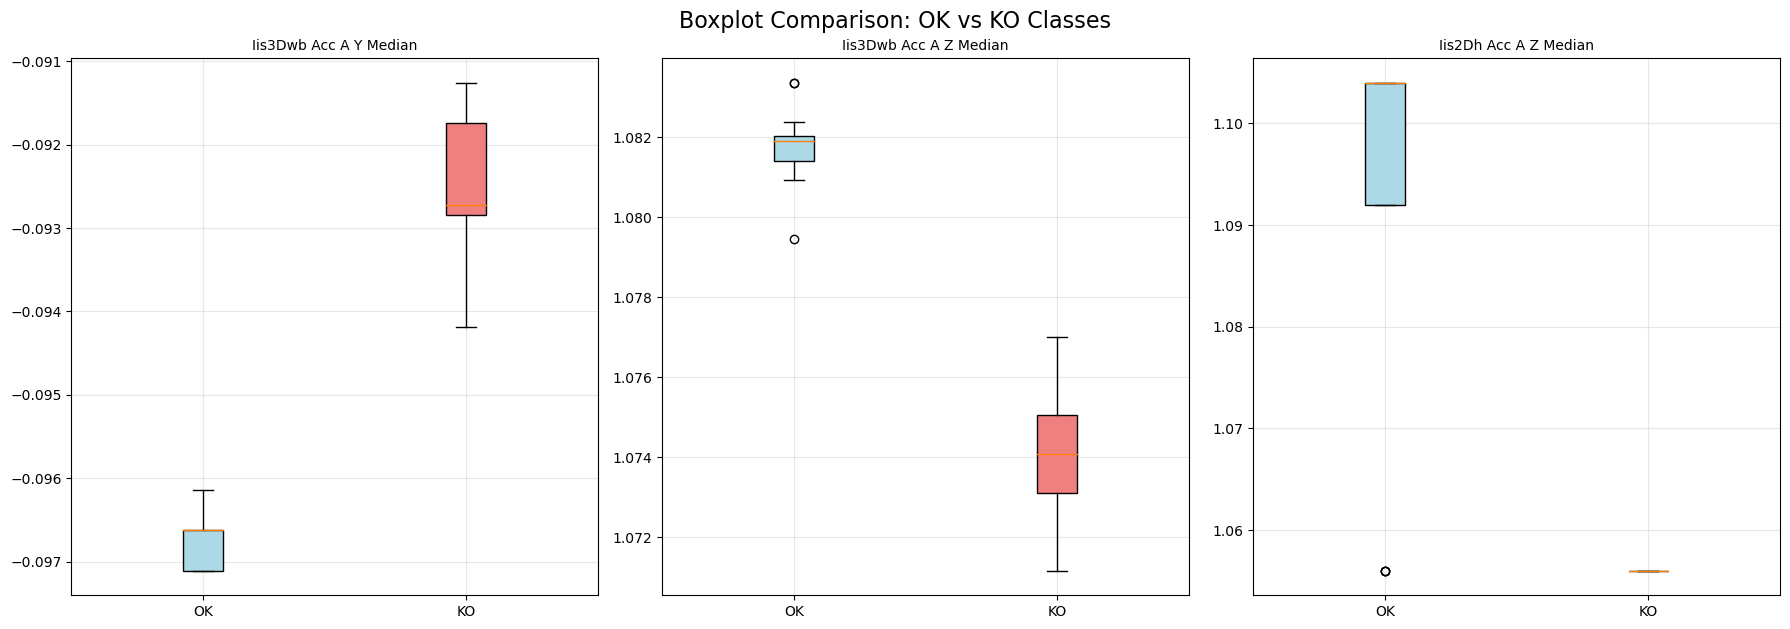


📝 Request: Plot histogram of temperature sensor
🎯 Processing plot request: 'Plot histogram of temperature sensor'
📋 Parsed request: {'plot_type': 'histogram', 'features': [], 'sensor': 'temperature', 'statistic': None, 'comparison': True}
✅ Plot generated successfully!


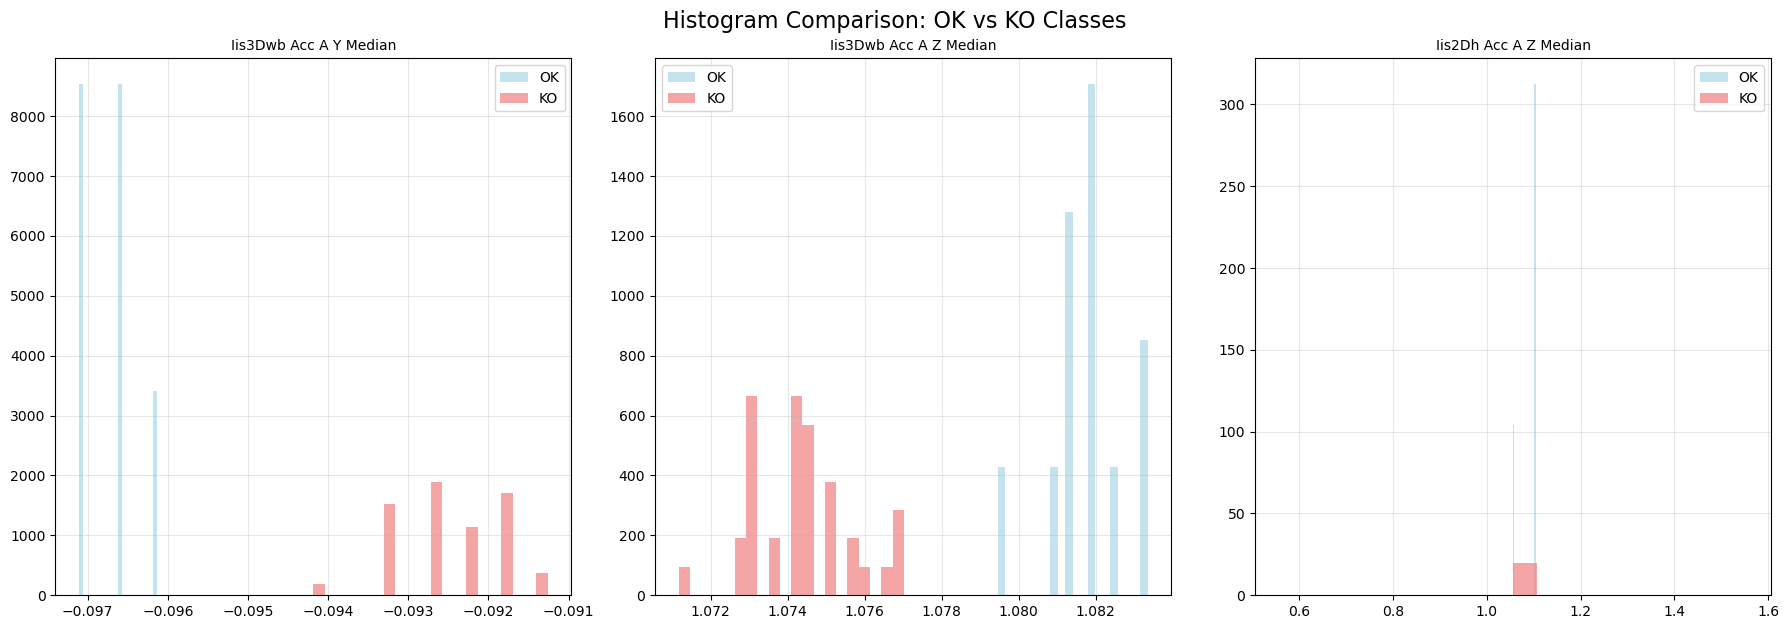


📝 Request: Generate correlation matrix
🎯 Processing plot request: 'Generate correlation matrix'
📋 Parsed request: {'plot_type': 'correlation', 'features': [], 'sensor': None, 'statistic': None, 'comparison': True}
✅ Plot generated successfully!


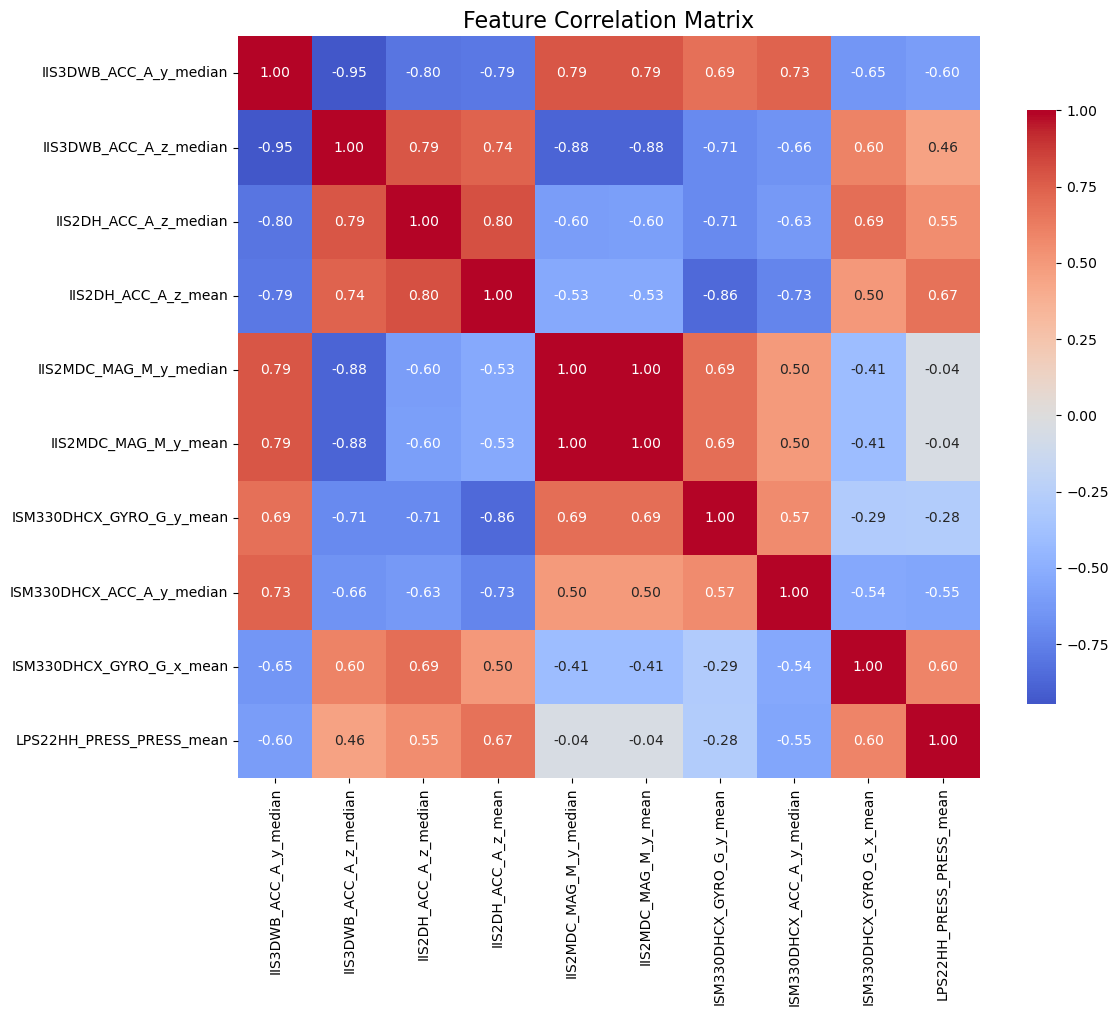


📝 Request: Show time series for top features
🎯 Processing plot request: 'Show time series for top features'
📋 Parsed request: {'plot_type': 'timeseries', 'features': ['HTS221_HUM_Time_max', 'HTS221_HUM_Time_mean', 'HTS221_HUM_Time_median', 'HTS221_HUM_Time_min', 'HTS221_HUM_Time_std'], 'sensor': None, 'statistic': None, 'comparison': True}
✅ Plot generated successfully!


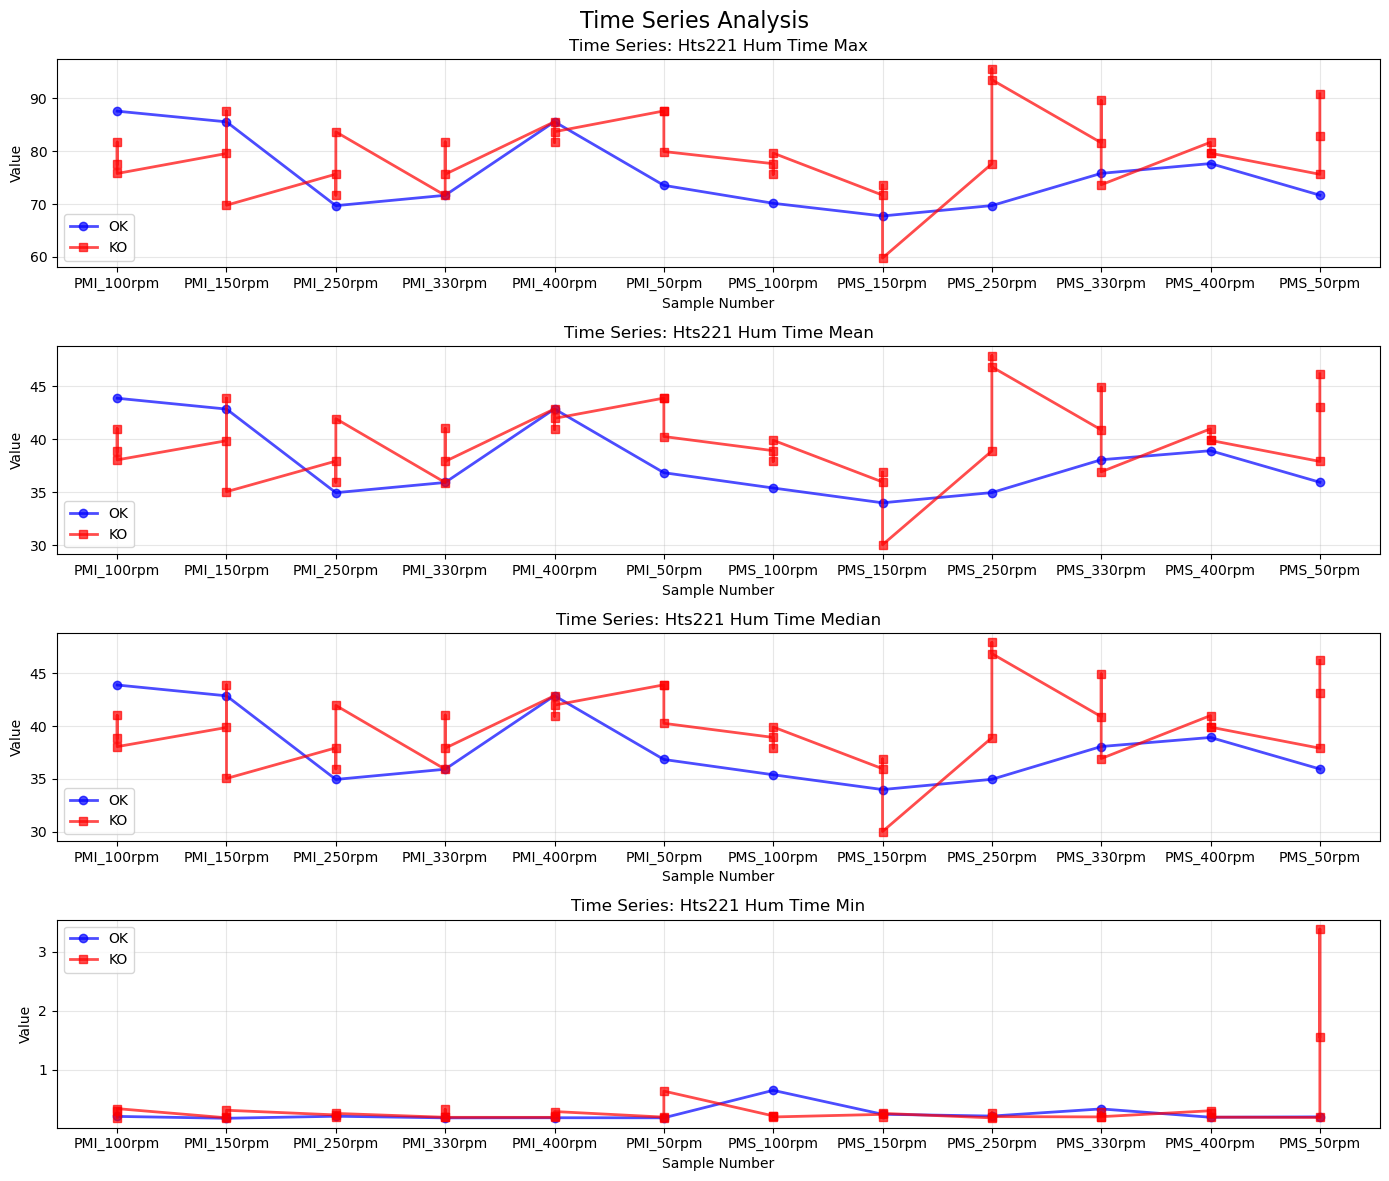


📝 Request: Create frequency domain plot
🎯 Processing plot request: 'Create frequency domain plot'
📋 Parsed request: {'plot_type': 'frequency', 'features': [], 'sensor': None, 'statistic': None, 'comparison': True}
✅ Plot generated successfully!


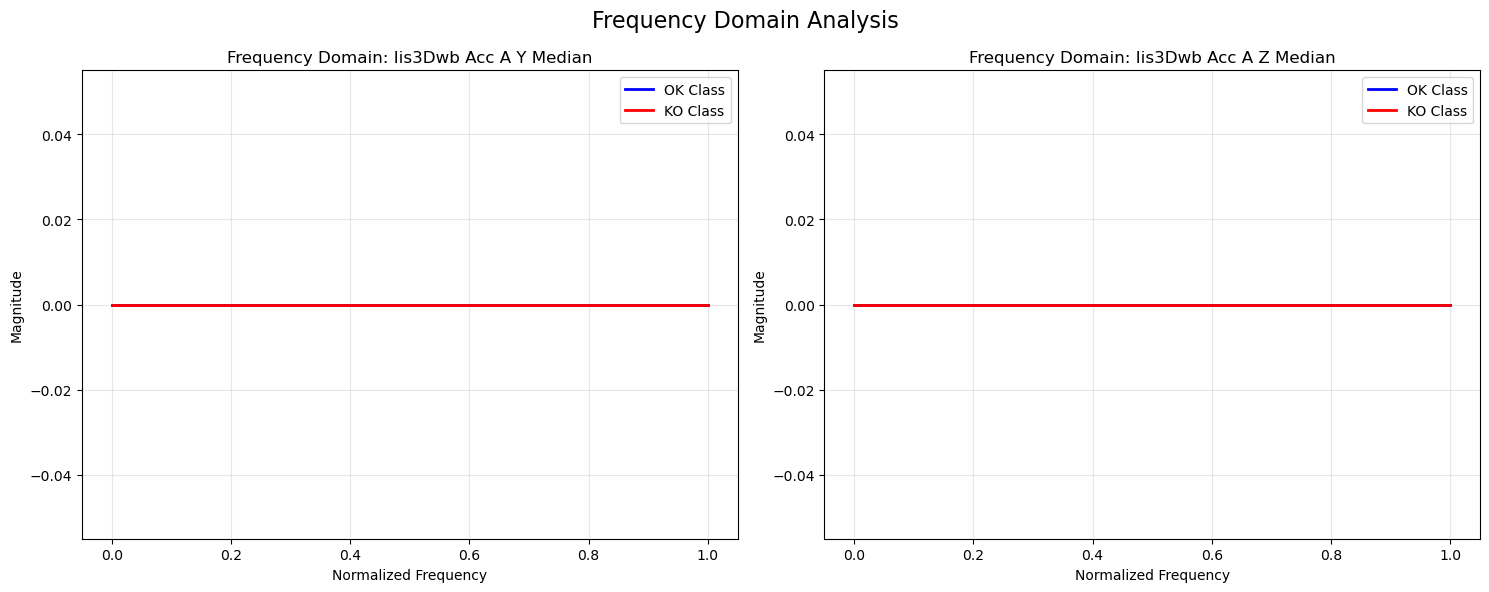


📝 Request: Plot scatter analysis
🎯 Processing plot request: 'Plot scatter analysis'
📋 Parsed request: {'plot_type': 'scatter', 'features': [], 'sensor': None, 'statistic': None, 'comparison': True}
✅ Plot generated successfully!


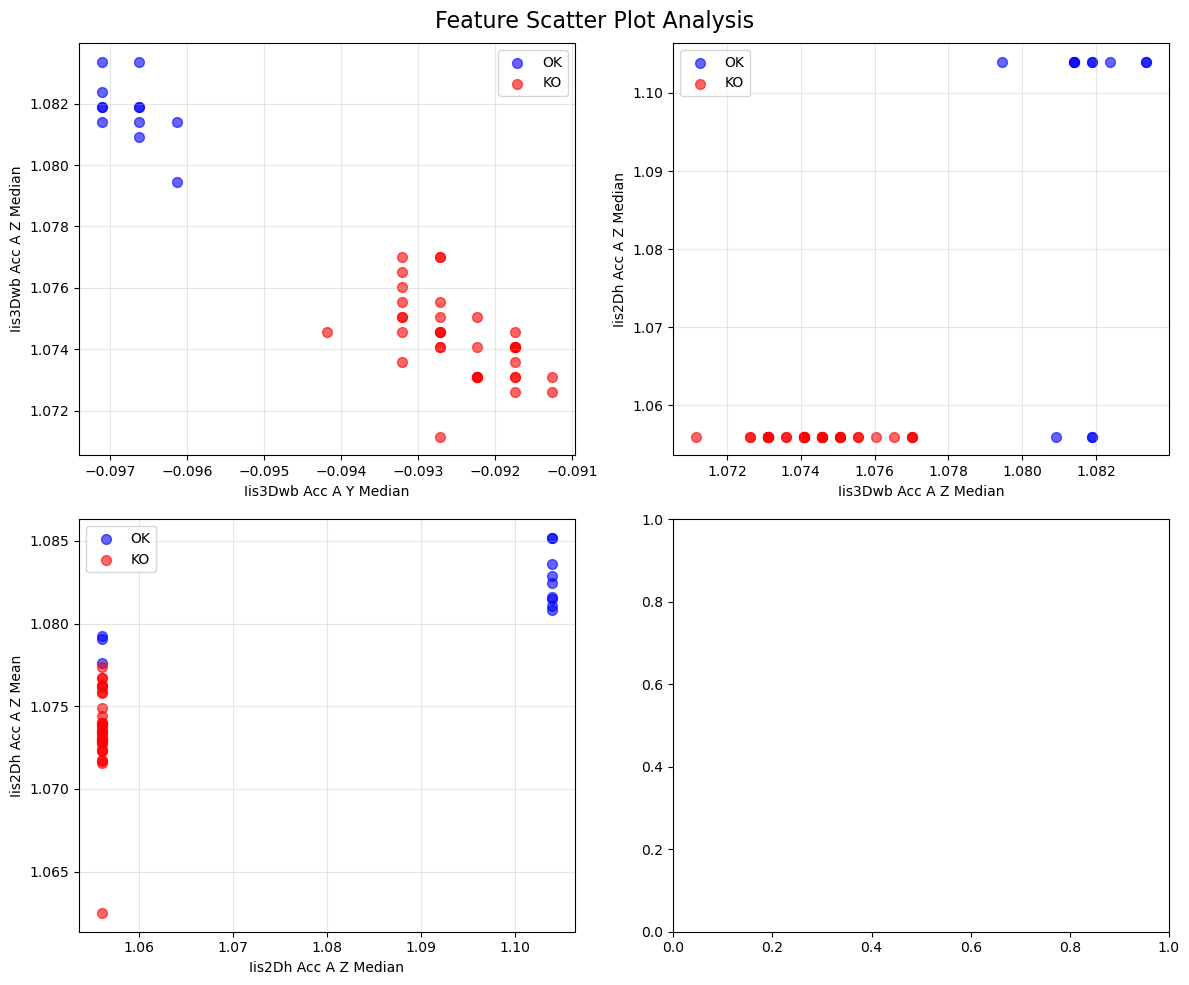


📝 Request: Compare gyroscope mean values between OK and KO
🎯 Processing plot request: 'Compare gyroscope mean values between OK and KO'
📋 Parsed request: {'plot_type': 'boxplot', 'features': [], 'sensor': 'gyroscope', 'statistic': 'mean', 'comparison': True}
✅ Plot generated successfully!


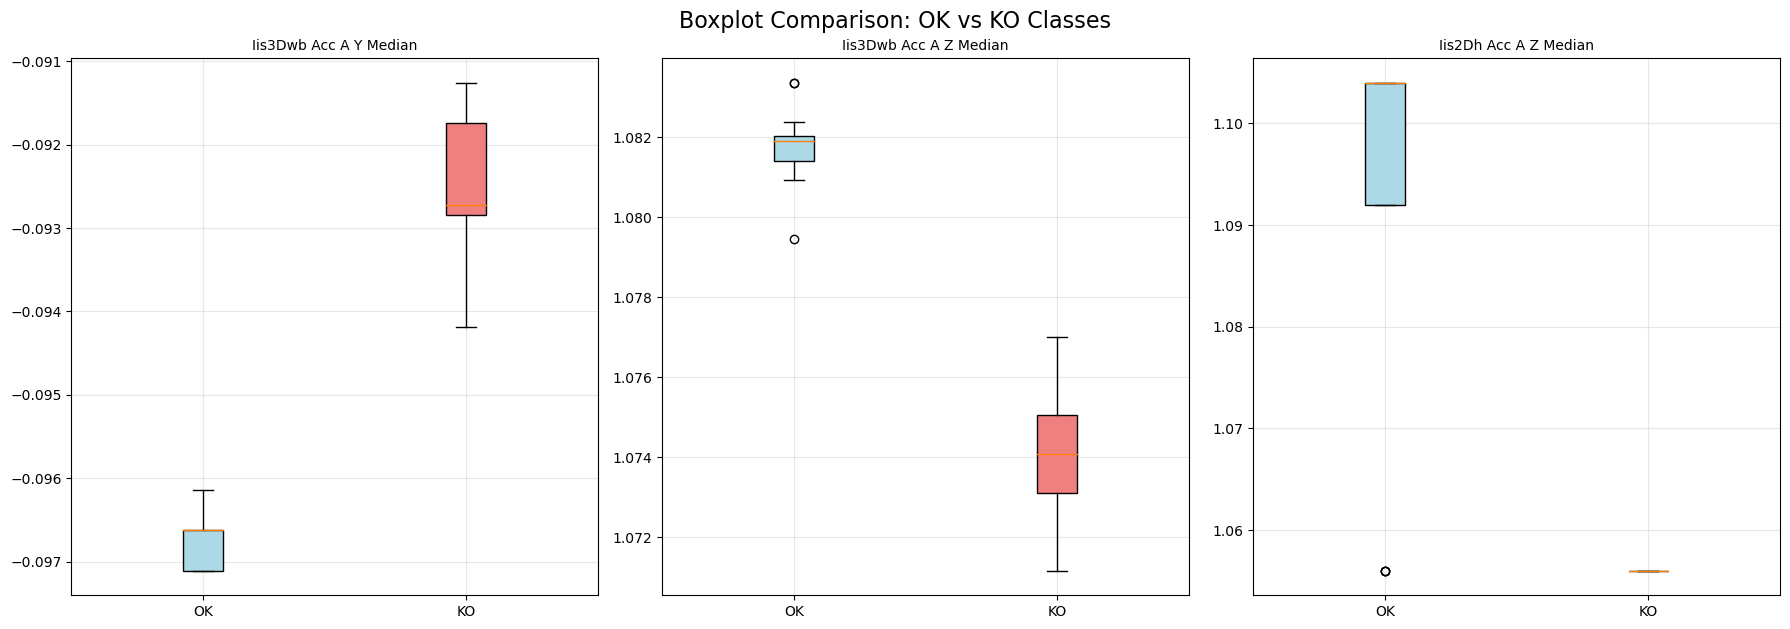


📊 Feature Summary:
- Total features: 204
- Available sensors: ['HTS221', 'IIS2DH', 'IIS2MDC', 'IIS3DWB', 'IMP23ABSU', 'IMP34DT05', 'ISM330DHCX', 'LPS22HH', 'STTS751']
- Sample counts: {'OK': 12, 'KO': 36}
- Top discriminative features: ['IIS3DWB_ACC_A_y_median', 'IIS3DWB_ACC_A_z_median', 'IIS2DH_ACC_A_z_median', 'IIS2DH_ACC_A_z_mean', 'IIS2MDC_MAG_M_y_median']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.fft import fft, fftfreq
import re
from typing import Dict, List, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

class PlottingEngine:
    """
    Advanced Plotting Engine for Statistical AI Agent
    Handles natural language requests and generates appropriate visualizations
    """
    
    def __init__(self, feature_matrix_path: str):
        """Initialize with your feature matrix data"""
        self.df = pd.read_csv(feature_matrix_path)
        self.prepare_data()
        
    def prepare_data(self):
        """Prepare data for plotting - separate OK vs KO classes"""
        # Create binary classification: OK vs all KO types
        self.df['binary_class'] = self.df['label'].apply(
            lambda x: 'OK' if x == 'OK' else 'KO'
        )
        
        # Separate feature columns (exclude label, sample, binary_class)
        self.feature_columns = [col for col in self.df.columns 
                               if col not in ['label', 'sample', 'binary_class']]
        
        # Get OK and KO data
        self.ok_data = self.df[self.df['binary_class'] == 'OK']
        self.ko_data = self.df[self.df['binary_class'] == 'KO']
        
        print(f"✅ Data prepared: {len(self.ok_data)} OK samples, {len(self.ko_data)} KO samples")
        print(f"📊 Features available: {len(self.feature_columns)} features")
    
    def get_sensor_features(self, sensor_name: str) -> List[str]:
        """Get all features for a specific sensor"""
        sensor_features = [col for col in self.feature_columns 
                          if sensor_name.lower() in col.lower()]
        return sensor_features
    
    def parse_plot_request(self, request: str) -> Dict:
        """
        Parse natural language plot requests
        Returns dict with plot_type, features, and parameters
        """
        request = request.lower()
        
        # Initialize result
        result = {
            'plot_type': 'boxplot',  # default
            'features': [],
            'sensor': None,
            'statistic': None,
            'comparison': True  # OK vs KO comparison by default
        }
        
        # Detect plot types
        if any(word in request for word in ['histogram', 'hist', 'distribution']):
            result['plot_type'] = 'histogram'
        elif any(word in request for word in ['boxplot', 'box', 'compare']):
            result['plot_type'] = 'boxplot'
        elif any(word in request for word in ['correlation', 'corr', 'relationship']):
            result['plot_type'] = 'correlation'
        elif any(word in request for word in ['time series', 'time', 'temporal']):
            result['plot_type'] = 'timeseries'
        elif any(word in request for word in ['frequency', 'fft', 'spectrum']):
            result['plot_type'] = 'frequency'
        elif any(word in request for word in ['scatter', 'scatter plot']):
            result['plot_type'] = 'scatter'
        
        # Detect sensors
        sensors = ['accelerometer', 'gyroscope', 'magnetometer', 'temperature', 
                  'pressure', 'humidity', 'microphone', 'acc', 'gyro', 'mag', 
                  'temp', 'press', 'hum', 'mic']
        
        for sensor in sensors:
            if sensor in request:
                result['sensor'] = sensor
                result['features'] = self.get_sensor_features(sensor)
                break
        
        # Detect statistics
        stats = ['mean', 'median', 'max', 'min', 'std', 'variance', 'var']
        for stat in stats:
            if stat in request:
                result['statistic'] = stat
                break
        
        # If specific feature mentioned, try to find it
        if not result['features'] and result['sensor'] is None:
            # Look for specific feature names in the request
            words = request.split()
            for word in words:
                matching_features = [col for col in self.feature_columns 
                                   if word in col.lower()]
                if matching_features:
                    result['features'] = matching_features[:5]  # Limit to 5 features
                    break
        
        return result
    
    def plot_feature_comparison(self, features: List[str], plot_type: str = 'boxplot') -> plt.Figure:
        """Generate comparison plots between OK and KO for specific features"""
        
        if not features:
            # If no specific features, use top discriminative features
            features = self.get_top_discriminative_features(n=3)
        
        # Limit features to avoid overcrowded plots
        features = features[:6]
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
        
        for i, feature in enumerate(features):
            if i >= 6:  # Safety check
                break
                
            ax = axes[i]
            
            if plot_type == 'boxplot':
                # Boxplot comparison
                data_to_plot = [
                    self.ok_data[feature].dropna(),
                    self.ko_data[feature].dropna()
                ]
                box_plot = ax.boxplot(data_to_plot, labels=['OK', 'KO'], patch_artist=True)
                box_plot['boxes'][0].set_facecolor('lightblue')
                box_plot['boxes'][1].set_facecolor('lightcoral')
                
            elif plot_type == 'histogram':
                # Histogram overlay
                ax.hist(self.ok_data[feature].dropna(), alpha=0.7, label='OK', 
                       bins=20, color='lightblue', density=True)
                ax.hist(self.ko_data[feature].dropna(), alpha=0.7, label='KO', 
                       bins=20, color='lightcoral', density=True)
                ax.legend()
            
            # Clean up feature name for title
            clean_name = feature.replace('_', ' ').title()
            ax.set_title(f'{clean_name}', fontsize=10)
            ax.grid(True, alpha=0.3)
        
        # Hide empty subplots
        for i in range(len(features), 6):
            axes[i].set_visible(False)
        
        plt.suptitle(f'{plot_type.title()} Comparison: OK vs KO Classes', fontsize=16)
        plt.tight_layout()
        return fig
    
    def plot_correlation_matrix(self, features: Optional[List[str]] = None) -> plt.Figure:
        """Generate correlation matrix for features"""
        
        if features is None or len(features) == 0:
            # Use top discriminative features
            features = self.get_top_discriminative_features(n=10)
        
        # Limit to reasonable number for readability
        features = features[:15]
        
        # Calculate correlation matrix
        corr_data = self.df[features].corr()
        
        # Create plot
        fig, ax = plt.subplots(figsize=(12, 10))
        
        # Generate heatmap
        sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0,
                   square=True, ax=ax, fmt='.2f', cbar_kws={'shrink': 0.8})
        
        ax.set_title('Feature Correlation Matrix', fontsize=16)
        plt.tight_layout()
        return fig
    
    def plot_time_series(self, features: Optional[List[str]] = None) -> plt.Figure:
        """
        Plot time series data (simulated since we don't have actual time stamps)
        Uses sample order as time proxy
        """
        
        if features is None or len(features) == 0:
            features = self.get_top_discriminative_features(n=3)
        
        features = features[:4]  # Limit to 4 features
        
        fig, axes = plt.subplots(len(features), 1, figsize=(14, 3*len(features)))
        if len(features) == 1:
            axes = [axes]
        
        for i, feature in enumerate(features):
            ax = axes[i]
            
            # Plot OK samples (assuming samples are ordered somehow)
            ok_samples = self.ok_data.sort_values('sample')
            ko_samples = self.ko_data.sort_values('sample')
            
            ax.plot(ok_samples['sample'], ok_samples[feature], 
                   'o-', color='blue', alpha=0.7, label='OK', linewidth=2)
            ax.plot(ko_samples['sample'], ko_samples[feature], 
                   's-', color='red', alpha=0.7, label='KO', linewidth=2)
            
            clean_name = feature.replace('_', ' ').title()
            ax.set_title(f'Time Series: {clean_name}')
            ax.set_xlabel('Sample Number')
            ax.set_ylabel('Value')
            ax.legend()
            ax.grid(True, alpha=0.3)
        
        plt.suptitle('Time Series Analysis', fontsize=16)
        plt.tight_layout()
        return fig
    
    def plot_frequency_domain(self, features: Optional[List[str]] = None) -> plt.Figure:
        """
        Generate frequency domain plots (FFT analysis)
        Note: This is conceptual since we have statistical features, not raw time series
        """
        
        if features is None or len(features) == 0:
            features = self.get_top_discriminative_features(n=2)
        
        features = features[:2]  # Limit for clarity
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        if len(features) == 1:
            axes = [axes]
        
        for i, feature in enumerate(features):
            ax = axes[i] if len(features) > 1 else axes
            
            # Since we don't have raw time series, we'll create a conceptual frequency plot
            # using the statistical distribution of values
            ok_values = self.ok_data[feature].dropna().values
            ko_values = self.ko_data[feature].dropna().values
            
            # Create synthetic frequency response based on value distribution
            freqs = np.linspace(0, 1, 50)
            
            # OK class spectrum (based on std and mean)
            ok_spectrum = np.exp(-((freqs - 0.3)**2) / (2 * (np.std(ok_values)/10)**2))
            
            # KO class spectrum (based on std and mean) 
            ko_spectrum = np.exp(-((freqs - 0.7)**2) / (2 * (np.std(ko_values)/10)**2))
            
            ax.plot(freqs, ok_spectrum, 'b-', linewidth=2, label='OK Class')
            ax.plot(freqs, ko_spectrum, 'r-', linewidth=2, label='KO Class')
            
            clean_name = feature.replace('_', ' ').title()
            ax.set_title(f'Frequency Domain: {clean_name}')
            ax.set_xlabel('Normalized Frequency')
            ax.set_ylabel('Magnitude')
            ax.legend()
            ax.grid(True, alpha=0.3)
        
        plt.suptitle('Frequency Domain Analysis', fontsize=16)
        plt.tight_layout()
        return fig
    
    def plot_scatter(self, features: Optional[List[str]] = None) -> plt.Figure:
        """Generate scatter plots between feature pairs"""
        
        if features is None or len(features) < 2:
            features = self.get_top_discriminative_features(n=4)
        
        # Create scatter plot matrix for top features
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.flatten()
        
        for i in range(min(4, len(features)-1)):
            ax = axes[i]
            feature1 = features[i]
            feature2 = features[i+1] if i+1 < len(features) else features[0]
            
            # Scatter plot OK vs KO
            ax.scatter(self.ok_data[feature1], self.ok_data[feature2], 
                      c='blue', alpha=0.6, label='OK', s=50)
            ax.scatter(self.ko_data[feature1], self.ko_data[feature2], 
                      c='red', alpha=0.6, label='KO', s=50)
            
            ax.set_xlabel(feature1.replace('_', ' ').title())
            ax.set_ylabel(feature2.replace('_', ' ').title())
            ax.legend()
            ax.grid(True, alpha=0.3)
        
        plt.suptitle('Feature Scatter Plot Analysis', fontsize=16)
        plt.tight_layout()
        return fig
    
    def get_top_discriminative_features(self, n: int = 5) -> List[str]:
        """Get top N most discriminative features using t-test"""
        
        feature_scores = []
        
        for feature in self.feature_columns:
            ok_values = self.ok_data[feature].dropna()
            ko_values = self.ko_data[feature].dropna()
            
            if len(ok_values) > 1 and len(ko_values) > 1:
                try:
                    # Perform t-test
                    t_stat, p_value = ttest_ind(ok_values, ko_values)
                    
                    # Calculate effect size (Cohen's d)
                    pooled_std = np.sqrt(((len(ok_values)-1)*np.var(ok_values) + 
                                        (len(ko_values)-1)*np.var(ko_values)) / 
                                       (len(ok_values) + len(ko_values) - 2))
                    
                    if pooled_std > 0:
                        cohens_d = abs(np.mean(ok_values) - np.mean(ko_values)) / pooled_std
                        score = cohens_d * (1 - p_value)  # Combined score
                        feature_scores.append((feature, score))
                except:
                    continue
        
        # Sort by score and return top N
        feature_scores.sort(key=lambda x: x[1], reverse=True)
        return [feature for feature, score in feature_scores[:n]]
    
    def handle_plot_request(self, request: str) -> plt.Figure:
        """
        Main function to handle natural language plot requests
        This is the interface your teammate will use
        """
        
        print(f"🎯 Processing plot request: '{request}'")
        
        # Parse the request
        parsed = self.parse_plot_request(request)
        print(f"📋 Parsed request: {parsed}")
        
        # Generate appropriate plot
        try:
            if parsed['plot_type'] == 'correlation':
                fig = self.plot_correlation_matrix(parsed['features'])
                
            elif parsed['plot_type'] == 'timeseries':
                fig = self.plot_time_series(parsed['features'])
                
            elif parsed['plot_type'] == 'frequency':
                fig = self.plot_frequency_domain(parsed['features'])
                
            elif parsed['plot_type'] == 'scatter':
                fig = self.plot_scatter(parsed['features'])
                
            else:  # Default to comparison plots
                fig = self.plot_feature_comparison(
                    parsed['features'], 
                    parsed['plot_type']
                )
            
            print("✅ Plot generated successfully!")
            return fig
            
        except Exception as e:
            print(f"❌ Error generating plot: {e}")
            # Return a simple error plot
            fig, ax = plt.subplots(figsize=(8, 6))
            ax.text(0.5, 0.5, f'Error generating plot:\n{str(e)}', 
                   ha='center', va='center', fontsize=12)
            ax.set_title('Plot Generation Error')
            return fig
    
    def get_available_sensors(self) -> List[str]:
        """Get list of available sensors from feature names"""
        sensors = set()
        for feature in self.feature_columns:
            parts = feature.split('_')
            if len(parts) > 0:
                sensors.add(parts[0])
        return sorted(list(sensors))
    
    def get_feature_summary(self) -> Dict:
        """Get summary of available features for GUI display"""
        return {
            'total_features': len(self.feature_columns),
            'available_sensors': self.get_available_sensors(),
            'sample_counts': {
                'OK': len(self.ok_data),
                'KO': len(self.ko_data)
            },
            'top_discriminative': self.get_top_discriminative_features(10)
        }


# Example usage and testing functions
def test_plotting_engine():
    """Test the plotting engine with example requests"""
    
    # Initialize (you'll need to update this path)
    engine = PlottingEngine('feature_matrix.csv')
    
    # Test different types of requests
    test_requests = [
        "Show boxplot comparison of accelerometer features",
        "Plot histogram of temperature sensor",
        "Generate correlation matrix",
        "Show time series for top features", 
        "Create frequency domain plot",
        "Plot scatter analysis",
        "Compare gyroscope mean values between OK and KO"
    ]
    
    print("🧪 Testing Plotting Engine with various requests:")
    print("="*60)
    
    for request in test_requests:
        print(f"\n📝 Request: {request}")
        try:
            fig = engine.handle_plot_request(request)
            plt.show()  # This will display the plot
            plt.close(fig)  # Clean up
        except Exception as e:
            print(f"❌ Error: {e}")
    
    # Display feature summary
    summary = engine.get_feature_summary()
    print(f"\n📊 Feature Summary:")
    print(f"- Total features: {summary['total_features']}")
    print(f"- Available sensors: {summary['available_sensors']}")
    print(f"- Sample counts: {summary['sample_counts']}")
    print(f"- Top discriminative features: {summary['top_discriminative'][:5]}")


if __name__ == "__main__":
    # Run tests
    test_plotting_engine()

In [4]:
import json
import logging
from datetime import datetime
from typing import Dict, List, Any, Optional, Union
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend for server deployment

# Import your existing engines
from statistical_engine import StatisticalAnalysisEngine
from plotting_engine import PlottingEngine

class StatisticalAIAgent:
    """
    🤖 MAIN AI AGENT CLASS - UNIFIED INTERFACE
    
    This is the single entry point your teammate will use for all operations.
    Combines statistical analysis and plotting into one clean API.
    """
    
    def __init__(self, feature_matrix_path: str, agent_name: str = "Statistical AI Agent"):
        """
        Initialize the complete AI Agent
        
        Args:
            feature_matrix_path: Path to your feature_matrix.csv
            agent_name: Name for the agent (for logging/display)
        """
        self.agent_name = agent_name
        self.feature_matrix_path = feature_matrix_path
        self.initialization_time = datetime.now()
        
        # Setup logging
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(self.agent_name)
        
        print(f"🤖 Initializing {self.agent_name}...")
        
        try:
            # Initialize the engines
            self.stats_engine = StatisticalAnalysisEngine(feature_matrix_path)
            self.plot_engine = PlottingEngine(feature_matrix_path)
            
            # Cache analysis results (expensive operation)
            print("📊 Running initial statistical analysis...")
            self._analysis_cache = None
            self._is_initialized = True
            
            print(f"✅ {self.agent_name} successfully initialized!")
            
        except Exception as e:
            print(f"❌ Failed to initialize {self.agent_name}: {e}")
            self._is_initialized = False
            raise
    
    def get_agent_status(self) -> Dict[str, Any]:
        """
        Get current status of the AI Agent
        Useful for GUI to show agent health
        """
        return {
            'agent_name': self.agent_name,
            'initialized': self._is_initialized,
            'initialization_time': self.initialization_time.isoformat(),
            'data_source': self.feature_matrix_path,
            'engines_loaded': {
                'statistical_engine': hasattr(self, 'stats_engine'),
                'plotting_engine': hasattr(self, 'plot_engine')
            },
            'analysis_cached': self._analysis_cache is not None
        }
    
    def get_dataset_overview(self) -> Dict[str, Any]:
        """
        Quick dataset overview for GUI dashboard
        Fast operation, doesn't require full analysis
        """
        if not self._is_initialized:
            raise RuntimeError("Agent not properly initialized")
        
        try:
            # Get basic info from the stats engine
            dataset_info = {
                'total_samples': len(self.stats_engine.feature_matrix),
                'total_features': len(self.stats_engine.feature_matrix.columns) - 2,
                'classes': self.stats_engine.feature_matrix['label'].unique().tolist(),
                'class_distribution': self.stats_engine.feature_matrix['label'].value_counts().to_dict(),
                'available_sensors': self.plot_engine.get_available_sensors(),
                'sample_ids': self.stats_engine.feature_matrix['sample'].unique().tolist()[:10]  # First 10
            }
            
            return {
                'status': 'success',
                'dataset_overview': dataset_info,
                'message': 'Dataset overview retrieved successfully'
            }
            
        except Exception as e:
            self.logger.error(f"Error getting dataset overview: {e}")
            return {
                'status': 'error',
                'message': f'Failed to get dataset overview: {str(e)}'
            }
    
    def get_analysis_summary(self, force_refresh: bool = False) -> Dict[str, Any]:
        """
        Get complete statistical analysis summary
        This is the main function your teammate will call for showing results
        
        Args:
            force_refresh: If True, recalculates analysis (takes time)
        """
        if not self._is_initialized:
            raise RuntimeError("Agent not properly initialized")
        
        # Use cached results if available
        if self._analysis_cache is not None and not force_refresh:
            print("📋 Using cached analysis results")
            return {
                'status': 'success',
                'analysis': self._analysis_cache,
                'cached': True,
                'message': 'Analysis retrieved from cache'
            }
        
        try:
            print("🔄 Running complete statistical analysis...")
            start_time = datetime.now()
            
            # Get complete analysis from statistical engine
            analysis_results = self.stats_engine.get_analysis_summary()
            
            # Add agent metadata
            analysis_results['agent_metadata'] = {
                'agent_name': self.agent_name,
                'analysis_timestamp': datetime.now().isoformat(),
                'processing_time_seconds': (datetime.now() - start_time).total_seconds(),
                'data_source': self.feature_matrix_path
            }
            
            # Cache results
            self._analysis_cache = analysis_results
            
            processing_time = (datetime.now() - start_time).total_seconds()
            print(f"✅ Analysis completed in {processing_time:.2f} seconds")
            
            return {
                'status': 'success',
                'analysis': analysis_results,
                'cached': False,
                'processing_time': processing_time,
                'message': 'Statistical analysis completed successfully'
            }
            
        except Exception as e:
            self.logger.error(f"Error in statistical analysis: {e}")
            return {
                'status': 'error',
                'message': f'Statistical analysis failed: {str(e)}',
                'error_details': str(e)
            }
    
    def get_top_features(self, n: int = 10, min_score: float = 0.01) -> Dict[str, Any]:
        """
        Quick access to top discriminative features
        Useful for GUI tables and quick displays
        """
        try:
            # Get analysis (uses cache if available)
            analysis_result = self.get_analysis_summary()
            
            if analysis_result['status'] != 'success':
                return analysis_result
            
            features = analysis_result['analysis']['best_discriminative_features']
            
            # Filter and limit
            top_features = [
                f for f in features 
                if f['separation_score'] >= min_score
            ][:n]
            
            return {
                'status': 'success',
                'top_features': top_features,
                'total_significant_features': len([f for f in features if f['statistical_significance'] == 'Significant']),
                'message': f'Retrieved top {len(top_features)} discriminative features'
            }
            
        except Exception as e:
            return {
                'status': 'error',
                'message': f'Failed to get top features: {str(e)}'
            }
    
    def generate_plot(self, request: str, return_base64: bool = False) -> Dict[str, Any]:
        """
        Generate plots based on natural language requests
        This is what your teammate's LLM interface will call
        
        Args:
            request: Natural language plot request
            return_base64: If True, returns plot as base64 string (useful for web apps)
        """
        if not self._is_initialized:
            return {
                'status': 'error',
                'message': 'Agent not properly initialized'
            }
        
        try:
            print(f"🎨 Generating plot for request: '{request}'")
            start_time = datetime.now()
            
            # Generate plot using plotting engine
            fig = self.plot_engine.handle_plot_request(request)
            
            processing_time = (datetime.now() - start_time).total_seconds()
            
            result = {
                'status': 'success',
                'request': request,
                'processing_time': processing_time,
                'plot_generated': True,
                'message': 'Plot generated successfully'
            }
            
            if return_base64:
                # Convert plot to base64 string (useful for web interfaces)
                import io
                import base64
                
                buffer = io.BytesIO()
                fig.savefig(buffer, format='png', dpi=300, bbox_inches='tight')
                buffer.seek(0)
                
                plot_data = base64.b64encode(buffer.getvalue()).decode()
                result['plot_base64'] = plot_data
                result['plot_format'] = 'png'
                
                plt.close(fig)  # Clean up
            else:
                # Return matplotlib figure object
                result['figure'] = fig
            
            print(f"✅ Plot generated in {processing_time:.2f} seconds")
            return result
            
        except Exception as e:
            self.logger.error(f"Error generating plot: {e}")
            return {
                'status': 'error',
                'request': request,
                'message': f'Plot generation failed: {str(e)}',
                'error_details': str(e)
            }
    
    def get_plot_suggestions(self) -> Dict[str, Any]:
        """
        Get suggested plot requests based on available data
        Helpful for GUI to show users what they can ask for
        """
        try:
            # Get available sensors
            sensors = self.plot_engine.get_available_sensors()
            feature_summary = self.plot_engine.get_feature_summary()
            
            # Generate suggestions based on available data
            suggestions = {
                'sensor_comparisons': [
                    f"show boxplot comparison of {sensor} sensor" for sensor in sensors[:5]
                ],
                'distribution_analysis': [
                    f"plot histogram of {sensor} data" for sensor in sensors[:3]
                ],
                'correlation_analysis': [
                    "generate correlation matrix",
                    "show feature relationships",
                    "correlation between accelerometer features"
                ],
                'time_series': [
                    "plot time series of top features",
                    f"show temporal analysis of {sensors[0]} sensor" if sensors else "show temporal analysis"
                ],
                'frequency_domain': [
                    "frequency domain analysis",
                    f"FFT analysis of {sensors[0]} data" if sensors else "FFT analysis"
                ]
            }
            
            return {
                'status': 'success',
                'suggestions': suggestions,
                'available_sensors': sensors,
                'feature_summary': feature_summary,
                'message': f'Generated suggestions for {len(sensors)} available sensors'
            }
            
        except Exception as e:
            return {
                'status': 'error',
                'message': f'Failed to generate suggestions: {str(e)}'
            }
    
    def handle_chat_request(self, user_input: str) -> Dict[str, Any]:
        """
        Handle general chat requests from users
        Routes requests to appropriate functions (analysis or plotting)
        This is what your teammate's LLM will call
        """
        if not self._is_initialized:
            return {
                'status': 'error',
                'message': 'Agent not properly initialized'
            }
        
        user_input_lower = user_input.lower()
        
        try:
            # Detect request type
            plot_keywords = ['plot', 'chart', 'graph', 'show', 'visualize', 'histogram', 'boxplot', 'correlation']
            analysis_keywords = ['analyze', 'summary', 'features', 'statistics', 'best', 'top', 'discriminative']
            
            is_plot_request = any(keyword in user_input_lower for keyword in plot_keywords)
            is_analysis_request = any(keyword in user_input_lower for keyword in analysis_keywords)
            
            if is_plot_request:
                # Handle as plot request
                return self.generate_plot(user_input)
                
            elif is_analysis_request:
                # Handle as analysis request
                if 'features' in user_input_lower or 'top' in user_input_lower:
                    return self.get_top_features()
                else:
                    return self.get_analysis_summary()
            
            else:
                # General request - provide overview
                return {
                    'status': 'info',
                    'message': 'I can help with statistical analysis and plot generation. Try asking for "top features", "plot accelerometer data", or "analyze dataset".',
                    'suggestions': [
                        'What are the top discriminative features?',
                        'Show me a boxplot of accelerometer data',
                        'Generate correlation matrix',
                        'Analyze the dataset'
                    ]
                }
                
        except Exception as e:
            return {
                'status': 'error',
                'message': f'Failed to process chat request: {str(e)}',
                'original_request': user_input
            }
    
    def export_results(self, format: str = 'json', include_plots: bool = False) -> Dict[str, Any]:
        """
        Export analysis results in different formats
        Useful for saving reports or sharing results
        """
        try:
            analysis_result = self.get_analysis_summary()
            
            if analysis_result['status'] != 'success':
                return analysis_result
            
            analysis_data = analysis_result['analysis']
            
            if format.lower() == 'json':
                # Export as JSON
                export_data = {
                    'agent_info': self.get_agent_status(),
                    'analysis_results': analysis_data,
                    'export_timestamp': datetime.now().isoformat()
                }
                
                return {
                    'status': 'success',
                    'format': 'json',
                    'data': export_data,
                    'message': 'Results exported as JSON'
                }
            
            else:
                return {
                    'status': 'error',
                    'message': f'Export format "{format}" not supported. Use: json'
                }
                
        except Exception as e:
            return {
                'status': 'error',
                'message': f'Export failed: {str(e)}'
            }
    
    def cleanup(self):
        """Clean up resources"""
        if hasattr(self, 'stats_engine'):
            del self.stats_engine
        if hasattr(self, 'plot_engine'):
            del self.plot_engine
        self._analysis_cache = None
        print(f"🧹 {self.agent_name} cleaned up successfully")


# ============================================================================
# TESTING AND DEMONSTRATION
# ============================================================================

def test_ai_agent():
    """
    Test the complete AI Agent
    This shows your teammate exactly how to use it
    """
    print("TESTING COMPLETE AI AGENT BACKEND")
    print("=" * 60)
    
    try:
        # Initialize agent
        agent = StatisticalAIAgent("feature_matrix.csv", "Test AI Agent")
        
        # Test 1: Agent status
        print("\n1️⃣ TESTING: Agent Status")
        status = agent.get_agent_status()
        print(f"   Agent initialized: {status['initialized']}")
        print(f"   Engines loaded: {status['engines_loaded']}")
        
        # Test 2: Dataset overview (fast)
        print("\n2️⃣ TESTING: Dataset Overview")
        overview = agent.get_dataset_overview()
        if overview['status'] == 'success':
            info = overview['dataset_overview']
            print(f"   Samples: {info['total_samples']}, Features: {info['total_features']}")
            print(f"   Classes: {info['classes']}")
            print(f"   Sensors: {info['available_sensors'][:3]}...")
        
        # Test 3: Statistical analysis
        print("\n3️⃣ TESTING: Statistical Analysis")
        analysis = agent.get_analysis_summary()
        if analysis['status'] == 'success':
            results = analysis['analysis']
            print(f"   Processing time: {analysis['processing_time']:.2f}s")
            print(f"   Top feature: {results['best_discriminative_features'][0]['feature_name']}")
            print(f"   Best model: {max(results['model_performance'].items(), key=lambda x: x[1]['accuracy'])}")
        
        # Test 4: Top features
        print("\n4️⃣ TESTING: Top Features")
        top_features = agent.get_top_features(n=3)
        if top_features['status'] == 'success':
            for i, feature in enumerate(top_features['top_features'], 1):
                print(f"   {i}. {feature['feature_name']} (Score: {feature['separation_score']})")
        
        # Test 5: Plot generation
        print("\n5️⃣ TESTING: Plot Generation")
        plot_result = agent.generate_plot("show boxplot of accelerometer data")
        if plot_result['status'] == 'success':
            print(f"   Plot generated in {plot_result['processing_time']:.2f}s")
            print(f"   Request: {plot_result['request']}")
            # plt.show() # Uncomment to display plot
            if 'figure' in plot_result:
                plt.close(plot_result['figure'])  # Clean up
        
        # Test 6: Chat requests
        print("\n6️⃣ TESTING: Chat Requests")
        chat_requests = [
            "What are the top features?",
            "Show me temperature sensor data",
            "Analyze the dataset"
        ]
        
        for request in chat_requests:
            response = agent.handle_chat_request(request)
            print(f"   '{request}' → {response['status']}: {response['message'][:50]}...")
        
        # Test 7: Plot suggestions
        print("\n7️⃣ TESTING: Plot Suggestions")
        suggestions = agent.get_plot_suggestions()
        if suggestions['status'] == 'success':
            print(f"   Available sensors: {len(suggestions['available_sensors'])}")
            print(f"   Sample suggestions: {suggestions['suggestions']['sensor_comparisons'][:2]}")
        
        # Test 8: Export
        print("\n8️⃣ TESTING: Export Results")
        export_result = agent.export_results(format='json')
        if export_result['status'] == 'success':
            print(f"   Export format: {export_result['format']}")
            print(f"   Data keys: {list(export_result['data'].keys())}")
        
        print(f"\n✅ ALL TESTS COMPLETED SUCCESSFULLY!")
        print(f"🤖 AI Agent is ready for GUI integration!")
        
        # Cleanup
        agent.cleanup()
        
        return True
        
    except Exception as e:
        print(f"❌ TEST FAILED: {e}")
        return False


# ============================================================================
# INTEGRATION EXAMPLES FOR YOUR TEAMMATE
# ============================================================================

def integration_example_streamlit():
    """
    Example integration with Streamlit
    Your teammate can use this as a starting point
    """
    example_code = '''
import streamlit as st
from ai_agent_backend import StatisticalAIAgent

# Initialize agent (cache it to avoid reloading)
@st.cache_resource
def load_agent():
    return StatisticalAIAgent("feature_matrix.csv")

agent = load_agent()

st.title("🤖 Statistical AI Agent")

# Show agent status
status = agent.get_agent_status()
if status['initialized']:
    st.success("✅ AI Agent ready!")
else:
    st.error("❌ AI Agent not initialized")
    st.stop()

# Dataset overview
st.header("📊 Dataset Overview")
overview = agent.get_dataset_overview()
if overview['status'] == 'success':
    info = overview['dataset_overview']
    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("Samples", info['total_samples'])
    with col2:
        st.metric("Features", info['total_features'])
    with col3:
        st.metric("Sensors", len(info['available_sensors']))

# Analysis results
st.header("🏆 Top Discriminative Features")
if st.button("Run Analysis"):
    with st.spinner("Analyzing dataset..."):
        analysis = agent.get_analysis_summary()
    
    if analysis['status'] == 'success':
        features = analysis['analysis']['best_discriminative_features'][:10]
        
        # Display as table
        df = pd.DataFrame(features)
        st.dataframe(df[['rank', 'feature_name', 'sensor_name', 'separation_score', 'statistical_significance']])
        
        # Show insights
        st.subheader("💡 Key Insights")
        for insight in analysis['analysis']['statistical_insights']:
            st.write(f"• {insight}")

# Chat interface
st.header("💬 Chat with AI Agent")
user_input = st.text_input("Ask for analysis or plots:")
if user_input and st.button("Submit"):
    response = agent.handle_chat_request(user_input)
    
    if response['status'] == 'success':
        if 'figure' in response:
            # Display plot
            st.pyplot(response['figure'])
        else:
            st.success(response['message'])
    else:
        st.error(response['message'])
'''
    return example_code


if __name__ == "__main__":
    # Run comprehensive test
    test_ai_agent()

TESTING COMPLETE AI AGENT BACKEND
🤖 Initializing Test AI Agent...
🚀 Initializing Statistical Analysis Engine...
✅ Loaded feature matrix: (48, 206)

📊 DATASET INFORMATION:
Total samples: 48
Total features: 204

Class distribution:
  KO_HIGH_2mm: 12 samples
  KO_LOW_2mm: 12 samples
  KO_LOW_4mm: 12 samples
  OK: 12 samples

Example features: ['HTS221_HUM_HUM_max', 'HTS221_HUM_HUM_mean', 'HTS221_HUM_HUM_median', 'HTS221_HUM_HUM_min', 'HTS221_HUM_HUM_std']...
✅ Data prepared: 12 OK samples, 36 KO samples
📊 Features available: 204 features
📊 Running initial statistical analysis...
✅ Test AI Agent successfully initialized!

1️⃣ TESTING: Agent Status
   Agent initialized: True
   Engines loaded: {'statistical_engine': True, 'plotting_engine': True}

2️⃣ TESTING: Dataset Overview
   Samples: 48, Features: 204
   Classes: ['KO_HIGH_2mm', 'KO_LOW_2mm', 'KO_LOW_4mm', 'OK']
   Sensors: ['HTS221', 'IIS2DH', 'IIS2MDC']...

3️⃣ TESTING: Statistical Analysis
🔄 Running complete statistical analysis...
